# Exploring My Music Tastes With Spotipy and Machine Learning
A detailed study into my music listening habits by Jaume Clave.  
June 6th, 2020 

#### Spotify
Spotify is the largest on-demand music service application today. The firm has a record of pushing boundaries in technology by using AI and machine learning to enhance the user experience through nuanced customer data insights. Founded in 2006 by Daniel Ek and Martin Lorentzon, headquartered in London and led by Ek, its CEO, Spotify gives its subscribers on-demand access to songs on their desktop computers, laptops, smartphones, tablets, and home entertainment systems. Spotify offers its more than 140 million monthly users (60 million of which are paying/premium users) access to more than 30 million songs. Spotify also gives users streaming access to podcasts and videos. The firm pays royalties to musical artists based on the number of times users stream songs. It employs approximately 1,400 people worldwide and has annual revenues of nearly $8 billion.

Since early 2014 Spotify has been acquiring companies that could help it act on AI and machine learning to discover and act on insights from external data and user behavior, preserving its place as one of the most popular music streaming sites on the web. The paragraph below is a (long) list of intelligence based companies Spotify has swallowed in its path:

In March 2014, Spotify acquired The Echo Nest, a music intelligence company. In June 2015, Spotify acquired Seed Scientific, a data science consulting firm and analytics company. In a comment to TechCrunch, Spotify said that Seed Scientific's team would lead an Advanced Analytics unit within the company focused on developing data services. In April 2016, Spotify acquired CrowdAlbum, a "startup that collects photos and videos of performances shared on social networks," and would "enhance the development of products that help artists understand, activate, and monetize their audiences".
In March 2017, Spotify acquired Sonalytic, an audio detection startup, for an undisclosed amount of money. Spotify stated that Sonalytic would be used to improve the company's personalised playlists, better match songs with compositions, and improve the company's publishing data system. Spotify also acquired MightyTV later in March, an app connected to television streaming services, including Netflix and HBO Go, that recommends content to users. Spotify mainly uses MightyTV to improve its advertising efforts on the free tier of service. In April 2017, Spotify acquired Mediachain, a blockchain startup that had been developing a decentralized database system for managing attribution and other metadata for media. In May 2017, Spotify acquired artificial intelligence startup Niland, and uses its technology to improve its personalisation and recommendation features for users

#### The Project
In light of all these data science and intelligence acquisitions Spotify is making, I have decided to explore one of the apps that I use the most and hopefully discover something about myself I did not know before. This project takes a detailed look at one of my Spotify playlists using Spotipy. Spotify's Python API. Artists and songs are studied for key audio features that are presented by the API. My listening trends are studied over time to see how the time of the year impacts my listening habits. The paper then uses various unsupervised machine learning models to group and cluster different songs in my playlist and form custom genres.


## Index

[Spotipy](#Spotipy)  
i. [Application Programming Interface (API)](#Application-Programming-Interface-(API))  
ii. [Fetching My Saved Tracks](#Fetching-My-Saved-Tracks)  
iii .[Songs and Artists From My Spotify Wrapped 2017](#Songs-and-Artists-From-My-Spotify-Wrapped-2017)  

[Analysis of My Monthly Playlists](#Analysis-of-My-Monthly-Playlists)  
i. [JSON](#JSON)  
ii. [Most Represented Artist and Album](#Most-Represented-Artist-and-Album)   
iii.[Visualising Track and Artist "Add to playlist" by Time](#Visualising-Track-and-Artist-"Add-to-playlist"-by-Time)  

[Calander Heatmap](#Calander-Heatmap)  
i. [Spotify's Discover Weekly](#Spotify's-Discover-Weekly)  

[Audio Features](#Audio-Features)  
i. [Monthly Analysis](#Monthly-Analysis)  
ii. [Finding Similar and Different Tracks](#Finding-Similar-and-Different-Tracks)  

[Dimensionality Reduction With Principal Component Analysis (PCA)](#Dimensionality-Reduction-With-Principal-Component-Analysis-(PCA))  
i. [Scree Plot](#Scree-Plot)  
ii. [Interactive Plots with Plotly](#Interactive-Plots-with-Plotly)  

[Clustering with K-Means](#Clustering-with-K-Means)  
i. [K-Means Inertia](#K-Means-Inertia)  
ii. [An Optimal $k$](#An-Optimal-$k$)  
iii. [Silhouette Diagram](#Silhouette-Diagram)  
iv. [Voronoi Diagram for $K = 8$](#Voronoi-Diagram-for-$K-=-8$)  
v. [$k = 8$ with 3 Principal Components](#$k-=-8$-with-3-Principal-Components)  
vi. [Cluster Analysis](#Cluster-Analysis)   

[My Tastes to Global Top 50](#My-Tastes-to-Global-Top-50)  
i. [Distribution Plots](#Distribution-Plots)  

[Song Count and Most Listened To](#Song-Count-and-Most-Listened-To)  
i. [Current Top Tracks and Artists](#Current-Top-Tracks-and-Artists)  

[Conclusion](#Conclusion)  
[Further Reading](#Further-Reading)


In [1]:
## Import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from dateutil.parser import parse as parse_date
from IPython.display import Image
from IPython.core.display import HTML
import seaborn as sns

import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)

import warnings
warnings.filterwarnings('ignore')

## Spotipy
Spotipy is a lightweight Python library for the Spotify Web API. With Spotipy a user can get full access to all of the music data provided by the Spotify platform. Spotipy supports all of the features of the Spotify Web API including access to all end points, and support for user authorization. For readers interested in the details on the capabilities of the library I encourage them to review the [Spotify Web API](https://developer.spotify.com/documentation/web-api/) documentation.

All methods require user authorization. In order to use it a user will need to register their app at [My Dashboard](https://developer.spotify.com/dashboard/login) to get the credentials necessary to make authorized calls (a client id and client secret). A Spotify Dashboard is a place for developers to create and manage their Spotify integrations.

In [2]:
## load Spotify API credentials
api_creds = pd.read_csv('api_keys.csv', header = None)

In [3]:
## Import spotipy and create token
import spotipy
import spotipy.util as util

user_id = api_creds[1].iloc[0]
client_id = api_creds[1].iloc[1]
client_secret = api_creds[1].iloc[2]

## All scope
scope = 'ugc-image-upload user-read-playback-state streaming user-read-email playlist-read-collaborative \
user-modify-playback-state user-read-private playlist-modify-public user-library-modify user-top-read \
user-read-playback-position user-read-currently-playing playlist-read-private user-follow-read \
app-remote-control user-read-recently-played playlist-modify-private user-follow-modify user-library-read'


token = util.prompt_for_user_token(
    user_id,
    scope,
    client_id = client_id,
    client_secret = client_secret,
    redirect_uri='http://127.0.0.1:9090')

sp = spotipy.Spotify(auth = token)

### Application Programming Interface (API)
Spotipy is a Python API with Spotify. An application programming interface (API) is a computing interface which defines interactions between multiple software intermediaries. It defines the kinds of calls or requests that can be made, how to make them, the data formats that should be used, the conventions to follow, etc.

An API brokers access to a different application to provide functionality or access to data, so data can be included in different applications. Large tech companies, especially social media companies frequently make their aggregate data available to the public, but APIs are also maintained by government organizations, conferences, publishing houses, software startups, fan groups, eSports leagues and even individuals, in order to share anything from social media content to trivia questions, rankings, maps, song lyrics, recipes, parts lists and more.

In short, any person or organization that collects data might have an interest in making that data available for use by a different app. It is a fantastic way to build communities and allow for easy access of data analysis and creation.

### Fetching My Saved Tracks
The API can be called in order to fetch the saved song in my library. Below is a call the fetches the tracks along with the name of the artist who made that track and prints the information.

In [4]:
results = sp.current_user_saved_tracks()
for item in results['items']:
    track = item['track']
    print(track['name'] + ' - ' + track['artists'][0]['name'])

Desde Que O Samba E Samba - Caetano Veloso
6 8 - Gabriel Garzón-Montano
Understanding (Comprehension) - Madlib
Rodman - Pardison Fontaine
Stretch and Bobbito Show '95 - Big L
No way home - KLEFTO
Comfortably Numb - 2011 Remastered Version - Pink Floyd
FREAK - KLEFTO
Find a Way - A Tribe Called Quest
So Ambitious - JAY-Z
Hustler's Ambition - 50 Cent
Without Me - Eminem
UMI Says - Mos Def
Int'l Players Anthem (I Choose You) - UGK
It Ain't Safe - Skepta
Cap Dem - Young Nudy
Just Begun (feat. Jay Electronica, J. Cole and Mos Def) - Talib Kweli
Provider - Frank Ocean
Hold Up - Beyoncé
You Can't Turn Me Away - Mixed - Sylvia Striplin


### Songs and Artists From My Spotify Wrapped 2017
I think that 2017 was my "best" music year. I remember it as a year where I was living with three of my best friends in an old Victorian flat in the Maida Vale borough in London. The location of the flat was amazing, we shared a quick 5 minute walk to a vast maze of canals and another 5 minute walk to a large park where we would spend most summer afternoons. Throughout the year we always had music on repeat. While we were cooking, talking and working out music would be on a continuous cycle and since everyone was able to play their playlists and their individual music it was extremely easy to pick up and add songs that were new to me and add the tracks to my rotation. 

The 2017 Spotify Wrapped playlist confirmed that. It was the year which I spent the most time listening to music to, to this day. It was the year where I listened to the most amount of artists and most amount of genres. It was the year I discovered the most amount of music, and that alone makes it the best year.

This section calls that playlist using the Spotipy API and shows the amount of times an artist made the playlist.

In [5]:
## Playlist ID
playlist_id = '37i9dQZF1E9Z5O3LQ5a9Hx'

playlist = sp.user_playlist(user_id, playlist_id)
tracks = playlist['tracks']['items']
next_uri = playlist['tracks']['next']

In [6]:
## Create DF containing track and artist
tracks_df = pd.DataFrame([(track['track']['id'], track['track']['artists'][0]['name'], track['track']['name'],
                           parse_date(track['track']['album']['release_date']) if track['track']['album']['release_date'] \
                           else None, 
                           parse_date(track['added_at']))
                    for track in playlist['tracks']['items']], columns=['id', 'artist', 'name', 'release_date', 'added_at'] )

In [7]:
## Groupby artist name
tracks_df \
    .groupby('artist') \
    .count()['id'] \
    .reset_index() \
    .sort_values('id', ascending=False) \
    .rename(columns={'id': 'amount'}) \
    .head(10)

,artist,amount
17,Drake,6
0,2 Chainz,5
32,Kendrick Lamar,5
2,A$AP Mob,4
29,JAY-Z,4
21,Frank Ocean,3
28,Isaiah Rashad,3
41,NxWorries,3
19,FKJ,3
54,Travis Scott,3


## Analysis of My Monthly Playlists
This section will fetch, store and clean each one of my monthly playlists. Since March 2019, I have been creating a monthly playlist titled, YYYY.MM, and have added songs to that playlist as the days of that month went on filling it up with new music I found or with old gems I rediscovered.

Each playlist will be collated and concatenated together to form a large data frame containing each song from each monthly playlist.


In [8]:
## Names of playlists
playlist_dict = dict()

playlist_names = ['19.03', '19.04', '19.05', '19.06', '19.07', '19.08', '19.09', '19.10', \
                  '19.11', '19.12', '2020.01', '2020.02', '2020.03', '2020.04', '2020.05']

### JSON
The Spotipy API returns data in JSON format. JSON stands for JavaScript Object Notation and is basically a way of representing data that looks like JavaScript objects. JSON is fairly easy to read, for computers and humans alike, it is easy for machines to parse and generate — the data is stored as key/value pairs. JSON is a text format that is completely language independent but uses conventions that are familiar to programmers of the C-family of languages, including C, C++, C#, Java, JavaScript, Perl, Python, and many others. These properties make JSON an ideal data-interchange language. This means that the key is on the left, and the value on the right.

JSON is built on two structures:

        A collection of name/value pairs. In various languages, this is realized as an object, record, struct, dictionary, 
        hash table, keyed list, or associative array.
        An ordered list of values. In most languages, this is realized as an array, vector, list, or sequence.

These are universal data structures. Virtually all modern programming languages support them in one form or another. It makes sense that a data format that is interchangeable with programming languages also be based on these structures.

Taking a look below, an example of a key/value pair is for example the {'collaborative': False} item where 'collaborative' is the key and 'false' is the value. Another item example is {'name': 'Creative Flow'} where 'name' is the key and 'Creative Flow' is the value.

In [9]:
## Return all playlists with metadata
playlists = sp.user_playlists(user_id)
playlists['items'][0]

{'collaborative': False,
 'description': 'The songs you loved most this year, all wrapped up.',
 'external_urls': {'spotify': 'https://open.spotify.com/playlist/37i9dQZF1EtnQ0jMYBpCho'},
 'href': 'https://api.spotify.com/v1/playlists/37i9dQZF1EtnQ0jMYBpCho',
 'id': '37i9dQZF1EtnQ0jMYBpCho',
 'images': [{'height': None,
   'url': 'https://lineup-images.scdn.co/your-top-songs-2019_DEFAULT-en.jpg',
   'width': None}],
 'name': 'Your Top Songs 2019',
 'owner': {'display_name': 'Spotify',
  'external_urls': {'spotify': 'https://open.spotify.com/user/spotify'},
  'href': 'https://api.spotify.com/v1/users/spotify',
  'id': 'spotify',
  'type': 'user',
  'uri': 'spotify:user:spotify'},
 'primary_color': None,
 'public': False,
 'snapshot_id': 'MjYyNjk3MDYsMDAwMDAwMDBmYmZmMzI5NzlmOWYxYjljYjAyOTNhNzI5MjE0MDJlOA==',
 'tracks': {'href': 'https://api.spotify.com/v1/playlists/37i9dQZF1EtnQ0jMYBpCho/tracks',
  'total': 100},
 'type': 'playlist',
 'uri': 'spotify:playlist:37i9dQZF1EtnQ0jMYBpCho'}

In [10]:
## Loop through and append key/value pair to dictionary
for i in range (1, 51):
    try:
        if playlists['items'][i]['name'] in playlist_names:
            name = playlists['items'][i]['name']
            playlist_dict[name] = playlists['items'][i]['id']
    except:
        pass

Because there are many months of playlists (i.e. many playlists) a function is created that will help automate what was done above for the Top 2017 playlist. That is, fetch the playlist by ID, collect all the track ids, names, artists, album, popularity scores, release dates and create a data frame with those instances.

In [11]:
## Function to automate the procedure
def playlist_df(playlist_id):

    playlist = sp.user_playlist(user_id, playlist_id)
    tracks = playlist['tracks']['items']
    next_uri = playlist['tracks']['next']
    name = playlist['name']

    tracks_df = pd.DataFrame([(track['track']['id'], track['track']['name'], track['track']['artists'][0]['name'], \
                               track['track']['album']['name'], track['track']['popularity'],
                            parse_date(track['track']['album']['release_date']) \
                               if track['track']['album']['release_date'] else None, 
                            parse_date(track['added_at']))
                        for track in playlist['tracks']['items']], \
                             columns=['id', 'name', 'artist', 'album', 'track popularity', 'release_date', 'added_at'])
    tracks_df['month'] = name
    image_url = playlist['images'][0]['url']
    image = Image(url = image_url, width =  300)
    return tracks_df, image

In [12]:
## All monthly playlists
month_1903 = playlist_df('56zUQj3TBSI6j5PlHPRLBQ')
month_1904 = playlist_df('03VpHpB8LOFKmdAOIJ1Cy7')
month_1905 = playlist_df('2vaV4o7uGhcAOaXxcNWOvQ')
month_1906 = playlist_df('7bsdl4pEkNSf1gKWD6QufH')
month_1907 = playlist_df('2HqFx79EmZ4Klf0NGnqODH')
month_1908 = playlist_df('2BLCVmV7afPqctrB37gPVQ')
month_1909 = playlist_df('34mKpy7mffl6kLg0B7EUU0')
month_1910 = playlist_df('3sFAE0XQrRI8XzeLOmOfXQ')
month_1911 = playlist_df('47ii7bEqC9qt3VfLrOJ8fY')
month_1912 = playlist_df('0qNg2SxPNUfUVW6tO7s3Me')
month_202001 = playlist_df('5IKAx9zt9B8pv3cAiIempp')
month_202002 = playlist_df('2vDHhBhPPi9vwwTH1iGSpD')
month_202003 = playlist_df('0YU9kPkV6x3QcPXNvi1ZnN')
month_202004 = playlist_df('0QqvjHLgbH5hga8LpMivnp')
month_202005 = playlist_df('2KLhtREwXmjIh9K4Xm9z3n')

Now the pd.concat method will be used to concatenate DataFrames. An axis needs to be specified. $axis=0$ tells pandas to stack the second DataFrame UNDER the first one. It will automatically detect whether the column names are the same and will stack accordingly.

In [13]:
## Concatinating all monthly playlists into a total playlist
monthly_playlist = pd.concat([month_1903[0], month_1904[0], month_1905[0], month_1906[0], month_1907[0], \
                              month_1908[0], month_1909[0], month_1910[0], month_1911[0], month_1912[0], \
                              month_202001[0], month_202002[0], month_202003[0], month_202004[0], month_202005[0]], axis = 0)

In [14]:
monthly_playlist

,id,name,artist,album,track popularity,release_date,added_at,month
0,6RtiYzLt3CeA9tpKvK5PxY,Keep your Eyes on yours,50 Cent,Rare,43,2003-10-15,2019-03-03 21:03:06+00:00,19.03
1,2LzPH4AEiPYXT2xQoRpHde,Sandstorm (feat. JID),Mereba,Sandstorm (feat. JID),0,2019-02-25,2019-03-03 21:03:21+00:00,19.03
2,0P6NVvZjbbhhDFWlfCdIUQ,Heat,50 Cent,Get Rich Or Die Tryin' (Explicit UK Version),0,2003-02-06,2019-03-03 21:04:18+00:00,19.03
3,0u3ePHOvketk9npqNoKGdN,Magic Stick,Lil' Kim,Rap,8,2018-10-05,2019-03-03 21:04:22+00:00,19.03
4,4KobhdHRpzTYiaZIW46aUu,It's a Hit,50 Cent,Rare,30,2003-10-15,2019-03-04 11:25:18+00:00,19.03
...,...,...,...,...,...,...,...,...
13,2BstRQGodshjGpeDGQiNgo,Do It Again,Steely Dan,Can't Buy A Thrill,70,1972-01-01,2020-05-18 21:31:02+00:00,2020.05
14,65rrcsD9FKM1RPDNCXMAdX,Rodman,Pardison Fontaine,UNDER8ED,59,2019-11-15,2020-05-19 12:55:06+00:00,2020.05
15,63rbs4sRRCJdQDKTWTrJ25,Understanding (Comprehension),Madlib,Beat Konducta Vol. 1-2: Movie Scenes,18,2006-03-21,2020-05-21 09:40:48+00:00,2020.05
16,1yCVsVH2hQ72SxNI8QTDaB,The Percocet & Stripper Joint,Future,DS2 (Deluxe),59,2015-07-17,2020-05-27 14:45:56+00:00,2020.05


### Most Represented Artist and Album
All the monthly playlists have been individually added to form a large dataset containing individual playlists since March, 2019. They are identified and individualized by the 'month' column which relates the name and month the playlist was created. This way the tracks can still be identified by their respective individual playlist. This will be useful later on during the month on month trend analysis.

No surprise to see JAY-Z as the top artist here, followed by fellow New Yorker hip-hop legends.

In [15]:
## Top 10 artists
monthly_playlist \
    .groupby('artist') \
    .count()['id'] \
    .reset_index() \
    .sort_values('id', ascending = False) \
    .rename(columns = {'id': 'amount'}) \
    .head(10)

,artist,amount
112,JAY-Z,21
180,Nas,9
1,50 Cent,7
159,Mac Miller,6
5,A Tribe Called Quest,6
152,Lil Wayne,6
111,J Dilla,5
137,Kanye West,5
69,Dave,4
274,Young Thug,4


It was interesting to see that the most times an album was repeated in the total playlist was three times. The first two albums are by Nas, the second most added artist in my rotation. 

In [16]:
## Top 10 albums
monthly_playlist \
    .groupby('album') \
    .count()['id'] \
    .reset_index() \
    .sort_values('id', ascending = False) \
    .rename(columns = {'id': 'amount'}) \
    .head(10)

,album,amount
311,The Lost Tapes,3
312,The Lost Tapes 2,3
142,Kamikaze,3
20,Anthology,3
108,Floor Seats,3
167,Lost & Found,3
280,Tha Carter II,3
151,LONG.LIVE.A$AP (Deluxe Version),3
83,DiCaprio 2,2
331,Traphouse Jazz,2


### Visualising Track and Artist "Add to playlist" by Time
I decided to get the top five artists from each month and check if I was adding them to other monthly playlists. This visualisation shows at what rate artists were added to each playlist. The number in the cells reflect the amount of times a different song by that artist was added to that monthly playlist. There are of course, some artist who have only been added once while other artists like JAY-Z have had a lot more consistency on my monthly rotation. 

The 9 times a JAY-Z track was added to the playlist in December 2019 is by far the most amount of times an artist has been added at a monthly interval. On December 4th, 2020 to celebrate his 50h, he returned his entire music catalog to Spotify where he’s sure to cash in on this gift to subscribers. His solo work disappeared from both Apple and Spotify in April 2017, but was quickly restored to Apple Music — not so with Spotify. At the time, Spotify only said the removal was done “at the request of the artist.” Today the world’s most popular streaming service said, “Happy birthday, Hov Welcome back to Spotify.” A very happy day for him and I alike, I'm sure!


In [17]:
counted_month_df = monthly_playlist \
    .assign(month_added = monthly_playlist['added_at'].dt.to_period('M')) \
    .groupby(['artist', 'month_added']) \
    .count()['id'] \
    .reset_index() \
    .rename(columns = {'id': 'amount'}) \
    .sort_values('amount', ascending = False)

in_top_5_month_artist = counted_month_df \
    .groupby('month_added') \
    .head(5) \
    .artist \
    .unique()

counted_month_df \
    [counted_month_df['artist'].isin(in_top_5_month_artist)] \
    .pivot('artist', 'month_added', 'amount') \
    .fillna(0) \
    .style.background_gradient()

month_added,2019-03,2019-04,2019-05,2019-06,2019-07,2019-08,2019-09,2019-10,2019-11,2019-12,2020-01,2020-02,2020-03,2020-04,2020-05
artist,,,,,,,,,,,,,,,
50 Cent,4,0,0,0,0,0,1,0,0,0,0,0,0,1,1
A Tribe Called Quest,0,0,1,1,0,1,1,0,0,0,0,0,0,0,2
A$AP Ferg,0,0,0,0,2,1,0,0,0,0,0,0,0,0,0
A$AP Rocky,0,0,0,1,3,0,0,0,0,0,0,0,0,0,0
Ab-Soul,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0
Baby Keem,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0
Budgie,0,0,2,0,0,0,1,0,0,0,0,0,0,0,0
Cam’ron,0,0,0,0,0,0,0,0,0,0,0,0,1,0,2
Chris Brown,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0


## Calendar Heatmap
Calendar heat map is a variation of a traditional heat map where data is laid-out on Calendar (typically month on column and weekdays on row, every data point being a date) and color encoding is depicted using metric of interest which varies by day. This is utilized to quickly see which are the "hot" days, the days with most track additions to a playlist.

The data needs to be represented in a yearly structure. A heat map is created for 2019 and another heat map is created for 2020. These two heat maps are then merged in the same image. The day with the most additions was 10, which happened in late June/early July. The summer months of 2019 seem to be the days with the most amount of additions and by paying attention to the day of week values on the right it is quickly seen that most additions to the playlist occur on the first couple days on the week (Monday, Tuesday and Wednesday). This is most likely because of Spotify’s __fantastic__ Discover Weekly playlist which comes out every Monday with 30 songs curated specially for me. Every Monday and during the beginning of the week I tend to listen to this playlist and I undoubtedly find songs that I like and therefore add them to my personal playlist.

### Spotify’s Discover Weekly
Spotify's Discover Weekly hit all users in July 2015. Every Monday, Discover Weekly gifts 200 million Spotify users with a playlist of thirty songs they’ve never heard before. It quickly caught fantastic reviews from all different types of critics and reviewers. In its first five months, Discovery Weekly resulted in 1.7 billion streams. It has grown to much higher heights since then.

If you have ever listened to your Discover Weekly you understand the power and success it has. Out of the thirty songs that are recommend, I find, twenty to be quite good and five or so of them to be amazing. This playlist uncovers gems for me, on a weekly basis. Like a friend that knows me all to well recommending me songs they will know I like. 

The playlist is curated specially for you using a recommendation system. A recommendation system is an algorithm which tries to predict the rating or preference a user would give to an item, like a song or movie. Leveraging this information, the system suggests a number of further items the user may enjoy. Recommendation systems are used across many types of media. The last time you watched Netflix or bought a book on Amazon, you may recall being gently offered to watch other movies or buy other books. The basic technology that powers recommendation systems is largely the same, regardless of the specific domain of application (like movies, books or films).

The model behind the recommendation model is not a revolutionary one. Instead, it’s a combination of a number of effective recommendation techniques previously used by other industry players. This has led to a uniquely powerful music recommendation engine, mainly based on three recommendation models:
        
        1. Collaborative filtering consists of collecting and analyzing users’ behaviors
        2. Content-based filtering looks at the descriptions of songs and artists
        3. Audio features are extracted from the raw audio through machine learning.
        
All (music) recommendation systems struggle with the same uphill task. They’re supposed to suggest music that people will like, but, at the same time, is somewhat outside of their listening bubble. In order to be effective, a discovery engine should strike a harmony between two opposite forces: similarity and diversity.


In [18]:
## Import calander plot
import calplot

dms = monthly_playlist.groupby(monthly_playlist['added_at'].dt.to_period('D')).count()['id'].to_timestamp()
idx = pd.date_range('2019-1-1', '2020-12-31')

dms.index = pd.DatetimeIndex(dms.index)
daily_adds = dms.reindex(idx, fill_value = 0)

In [19]:
## Create discrete colors
from pylab import *
cmap = cm.get_cmap('YlGn', 10) 

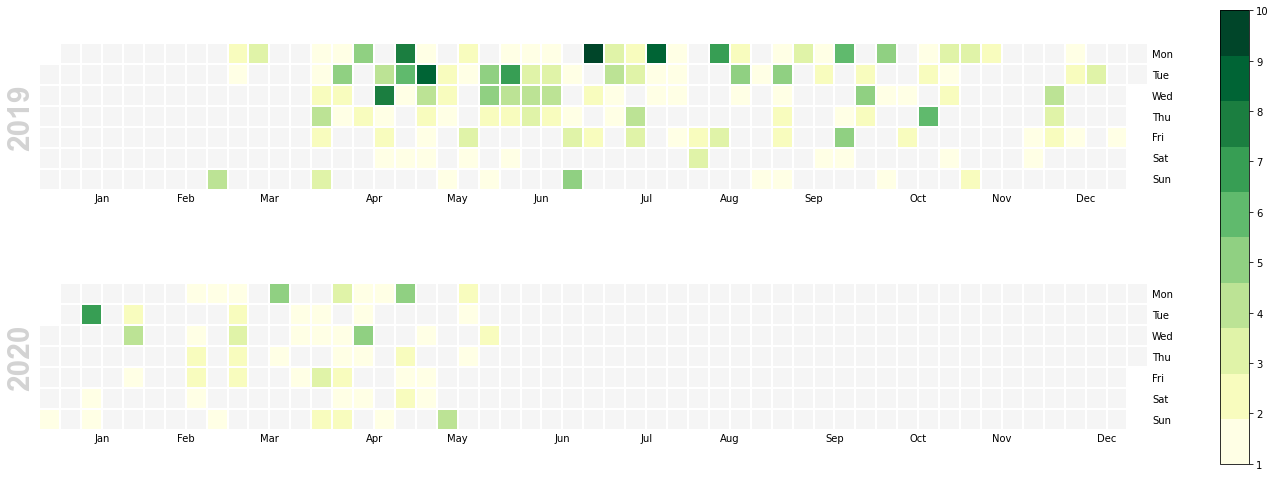

In [20]:
## Plot
calplot.calplot(daily_adds, cmap = cmap, figsize = (20, 7))
plt.show()

## Audio Features
Audio Features is the term assigned to a range of quantitative metrics that are believed to create a profile of a song that is relatable and relevant. Spotify uses these audio features, along with additional metrics about us as individuals, to help generate the content that is recommended to us via curated playlists.

Spotify uses convolutional neural networks to extract musical features directly from raw audio. Interestingly, convolutional networks have mainly been used with visual data. As a result, data scientists have successfully applied them to image detection. This is achieved by feeding a dataset of images to the network, pixel by pixel, to train the model. Once trained, the algorithm is capable of classifying different objects that appear in images that are new to the network. In the case of Spotify, the network has been modified to accept audio data as the input instead of pixels.

<img src="https://miro.medium.com/max/552/0*2j05Gl8cG4OC5YbY">

The architecture of Spotify’s network comprises four convolutional layers (the ones on the left in the above image) and three fully-connected layers (the ones on the right). The input consists of time-frequency representations of audio frames. The audio frames go through the four convolution layers undertaking several max pooling operations, which downsample the time-frequency representation. After a global temporal pooling layer, the data eventually flows through the three dense layers.  

The output of the neural network consists of an understanding of the song, which includes audio features such as key, mode, tempo, loudness and time signature. The image below is a plot of the output of the network for 30 seconds of ‘Around the World’ by Daft Punk.

<img src="https://miro.medium.com/max/552/0*2cC9OQjNhsYzDMl0">

The extracted audio features provide a song’s sonic profile. Sonic profiles are compared against each other to find similarities among the songs in Spotify’s database. Ultimately, this information is used to recommend new songs to users that are sonically similar to what they like.

Each song on Spotify has these audio features and they can be accessed easily using Spotipy and the 'audio_features' call. This section below explores the audio features for the songs in the playlist studied. A function is created to display the song in my playlist with the maximum and minimum value for each audio feature. Each feature is explained in order for the reader to get a sense of what the feature represents before showing the song with the most extreme value in my playlist

In [21]:
## For song in monthly_playlist return the audio_features
features = list()

for n, chunk_series in monthly_playlist.groupby(np.arange(len(monthly_playlist)) // 100)['id']:
    features += sp.audio_features([*map(str, chunk_series)])

features_df = pd.DataFrame.from_dict(filter(None, features))

tracks_with_features_df = monthly_playlist.merge(features_df, on = ['id'], how = 'inner')

In [22]:
## Function to return song and info based on min/max extreme
def feature_extreme(feature, extreme):
    if extreme == 'max':
        df_max = tracks_with_features_df[feature].max()
        df = tracks_with_features_df[tracks_with_features_df[feature] == df_max]

        track_url = sp.track(df['id'].iloc[0])['external_urls']['spotify']

        image_url = sp.track(df['id'].iloc[0])['album']['images'][0]['url']

        print(f"The song with the maximum {feature} in my playlist is {df['name'].iloc[0]}. \
              With a maximum {feature} value of {df_max}. The song is by {df['artist'].iloc[0]}, \
              released on the {df['album'].iloc[0]} album in {df['release_date'].dt.to_period('D').iloc[0]}.", \
              f"The track can be listened to here: {track_url}", '\n', '\n')
    
        return Image(url = image_url, width = 250)
    
    elif extreme == 'min':
        df_min = tracks_with_features_df[feature].min()
        df = tracks_with_features_df[tracks_with_features_df[feature] == df_min]

        track_url = sp.track(df['id'].iloc[0])['external_urls']['spotify']

        image_url = sp.track(df['id'].iloc[0])['album']['images'][0]['url']

        print(f"The song with the minimum {feature} in my playlist is {df['name'].iloc[0]}. \
              With a minimum {feature} value of {df_min}. The song is by {df['artist'].iloc[0]}, \
              released on the {df['album'].iloc[0]} album in {df['release_date'].dt.to_period('D').iloc[0]}.", \
              f"The track can be listened to here: {track_url}", '\n', '\n')
    
        return Image(url = image_url, width = 250)
    
    else:
        raise ValueError('extreme value must be "max" or "min".')

### Acousticness 
A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.

In [23]:
feature_extreme('acousticness', 'max')

The song with the maximum acousticness in my playlist is Southern Nights.               With a maximum acousticness value of 0.993. The song is by Whitney,               released on the Light Upon the Lake: Demo Recordings album in 2017-11-10. The track can be listened to here: https://open.spotify.com/track/3HNKZy1An5Jlnb02lcV2yd 
 



In [24]:
feature_extreme('acousticness', 'min')

The song with the minimum acousticness in my playlist is San Francisco Knights (Instrumental).               With a minimum acousticness value of 0.0002. The song is by Thes One,               released on the 10 Years of Thes One album in 2017-09-22. The track can be listened to here: https://open.spotify.com/track/31xZVD02zeo37iR93FRRGv 
 



### Danceability 
Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.

In [25]:
feature_extreme('danceability', 'max')

The song with the maximum danceability in my playlist is OG Bobby Johnson.               With a maximum danceability value of 0.974. The song is by QUE.,               released on the Epic Hip Hop album in 2018-08-17. The track can be listened to here: https://open.spotify.com/track/1gsqKvGkcGLLGlGjFBGtJq 
 



In [26]:
feature_extreme('danceability', 'min')

The song with the minimum danceability in my playlist is Piano Concerto No. 2 in C Minor, Op. 18: I. Moderato.               With a minimum danceability value of 0.184. The song is by Sergei Rachmaninoff,               released on the Rubinstein Collection, Vol. 35: Rachmaninoff: Piano Concerto No.2; Rhapsody on a Theme of Paganini; Prelude album in 1999-10-12. The track can be listened to here: https://open.spotify.com/track/0WqmkFibOtOoilu8KDNN6G 
 



### Duration 
The duration of the track in milliseconds.

In [27]:
feature_extreme('duration_ms', 'max')

The song with the maximum duration_ms in my playlist is Piano Concerto No. 2 in C Minor, Op. 18: I. Moderato.               With a maximum duration_ms value of 611000. The song is by Sergei Rachmaninoff,               released on the Rubinstein Collection, Vol. 35: Rachmaninoff: Piano Concerto No.2; Rhapsody on a Theme of Paganini; Prelude album in 1999-10-12. The track can be listened to here: https://open.spotify.com/track/0WqmkFibOtOoilu8KDNN6G 
 



In [28]:
feature_extreme('duration_ms', 'min')

The song with the minimum duration_ms in my playlist is Intromental.               With a minimum duration_ms value of 52360. The song is by GZA,               released on the Pro Tools album in 2008-08-19. The track can be listened to here: https://open.spotify.com/track/4PONvhTFV8JOaZN2Xk2C4p 
 



### Energy
Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy.

In [29]:
feature_extreme('energy', 'max')

The song with the maximum energy in my playlist is OG Bobby Johnson.               With a maximum energy value of 0.972. The song is by QUE.,               released on the Epic Hip Hop album in 2018-08-17. The track can be listened to here: https://open.spotify.com/track/1gsqKvGkcGLLGlGjFBGtJq 
 



In [30]:
feature_extreme('energy', 'min')

The song with the minimum energy in my playlist is Suite bergamasque : 3. Clair de lune.               With a minimum energy value of 0.00674. The song is by Claude Debussy,               released on the Debussy - Claire De Lune and Beyond album in 2014-09-12. The track can be listened to here: https://open.spotify.com/track/65STOH1r53OntGvs89S2xR 
 



### Instrumentalness
Predicts whether a track contains no vocals. “Ooh” and “aah” sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly “vocal”. The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0.

In [31]:
feature_extreme('instrumentalness', 'max')

The song with the maximum instrumentalness in my playlist is Kübla.               With a maximum instrumentalness value of 0.966. The song is by Wyl,               released on the Kübla album in 2018-09-14. The track can be listened to here: https://open.spotify.com/track/0Y00pwKjuJ7vNTBshL5Nkt 
 



In [32]:
feature_extreme('instrumentalness', 'min')

The song with the minimum instrumentalness in my playlist is Heat.               With a minimum instrumentalness value of 0.0. The song is by 50 Cent,               released on the Get Rich Or Die Tryin' (Explicit UK Version) album in 2003-02-06. The track can be listened to here: https://open.spotify.com/track/0P6NVvZjbbhhDFWlfCdIUQ 
 



### Key 
The key the track is in. Integers map to pitches using standard Pitch Class notation . E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on.

In [33]:
feature_extreme('key', 'max')

The song with the maximum key in my playlist is Keep your Eyes on yours.               With a maximum key value of 11. The song is by 50 Cent,               released on the Rare album in 2003-10-15. The track can be listened to here: https://open.spotify.com/track/6RtiYzLt3CeA9tpKvK5PxY 
 



In [34]:
feature_extreme('key', 'min')

The song with the minimum key in my playlist is Can't Stop Lovin' You.               With a minimum key value of 0. The song is by Soul Dog,               released on the Movin On album in 2014-03-31. The track can be listened to here: https://open.spotify.com/track/1weOkEmnoTofa7j4afLbEL 
 



### Liveness
Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live.


In [35]:
feature_extreme('liveness', 'max')

The song with the maximum liveness in my playlist is Yacht Club.               With a maximum liveness value of 0.88. The song is by Rick Ross,               released on the Deeper Than Rap album in 2009-01-01. The track can be listened to here: https://open.spotify.com/track/2I9gsmUcIzdIwXvbOiy71Q 
 



In [36]:
feature_extreme('liveness', 'min')

The song with the minimum liveness in my playlist is Outstanding - Original 12" Mix.               With a minimum liveness value of 0.0319. The song is by The Gap Band,               released on the The Best Of The Gap Band album in 1994-06-07. The track can be listened to here: https://open.spotify.com/track/4SHR8Udn1oQ95yvXRZU1I8 
 



### Loudness
The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typical range between -60 and 0 db.

In [37]:
feature_extreme('loudness', 'max')

The song with the maximum loudness in my playlist is Thank You.               With a maximum loudness value of -1.063. The song is by JAY-Z,               released on the The Blueprint 3 album in 2009-09-08. The track can be listened to here: https://open.spotify.com/track/6up1XqJ3UkmvkVmtwGLsGg 
 



In [38]:
feature_extreme('loudness', 'min')

The song with the minimum loudness in my playlist is Suite bergamasque : 3. Clair de lune.               With a minimum loudness value of -32.343. The song is by Claude Debussy,               released on the Debussy - Claire De Lune and Beyond album in 2014-09-12. The track can be listened to here: https://open.spotify.com/track/65STOH1r53OntGvs89S2xR 
 



### Speechiness 
Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks.

In [39]:
feature_extreme('speechiness', 'max')

The song with the maximum speechiness in my playlist is Stretch and Bobbito Show '95.               With a maximum speechiness value of 0.686. The song is by Big L,               released on the NYC Goes Hard, Vol. 1: Real Hip Hop from New York's Best with DMX, Big L, Jadakiss, and More Kings of NY album in 2014-07-11. The track can be listened to here: https://open.spotify.com/track/5TKfioUU9D95jByQ4HU8c9 
 



In [40]:
feature_extreme('speechiness', 'min')

The song with the minimum speechiness in my playlist is Bitter.               With a minimum speechiness value of 0.0227. The song is by Cookin Soul,               released on the Polo Beats album in 2018-08-14. The track can be listened to here: https://open.spotify.com/track/0oquPTbfQI0lXQahXLDKYX 
 



### Tempo
The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration.

In [41]:
feature_extreme('tempo', 'max')

The song with the maximum tempo in my playlist is 93 'Til Infinity.               With a maximum tempo value of 206.247. The song is by Souls Of Mischief,               released on the 93 'til Infinity album in 1993-02-13. The track can be listened to here: https://open.spotify.com/track/0PV1TFUMTBrDETzW6KQulB 
 



In [42]:
feature_extreme('tempo', 'min')

The song with the minimum tempo in my playlist is Suite bergamasque : 3. Clair de lune.               With a minimum tempo value of 56.64. The song is by Claude Debussy,               released on the Debussy - Claire De Lune and Beyond album in 2014-09-12. The track can be listened to here: https://open.spotify.com/track/65STOH1r53OntGvs89S2xR 
 



### Valence
A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric)
while tracks with low valence sound more negative (e.g. sad, depressed, angry).

In [43]:
feature_extreme('valence', 'max')

The song with the maximum valence in my playlist is Classic.               With a maximum valence value of 0.966. The song is by Tony Bones The Producer,               released on the Magic Roundabout album in 2018-05-04. The track can be listened to here: https://open.spotify.com/track/1oSACtYTXU47tpiYnPAgt5 
 



In [44]:
feature_extreme('valence', 'min')

The song with the minimum valence in my playlist is Suite bergamasque : 3. Clair de lune.               With a minimum valence value of 0.0393. The song is by Claude Debussy,               released on the Debussy - Claire De Lune and Beyond album in 2014-09-12. The track can be listened to here: https://open.spotify.com/track/65STOH1r53OntGvs89S2xR 
 



### Monthly Analysis
Knowing now what each feature explains a month on month analysis can be conducted for each feature to see if there are any listening trends establish themselves. Maybe I add and listen to more dancable songs in the summer? Same idea with the energy feature while instrumentalness becomes prominant in the winter months?

In [45]:
## Audio features for all tracks in DF
audio_features = ['danceability', 'energy', 'key', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', \
                  'liveness', 'valence', 'tempo']
tracks_with_features_df[audio_features]

,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,0.782,0.480,11,-12.113,0.3610,0.00772,0.000001,0.0951,0.6340,90.688
1,0.637,0.512,2,-10.027,0.0978,0.59000,0.000464,0.0712,0.3300,109.492
2,0.508,0.967,6,-2.777,0.5680,0.26700,0.000000,0.3610,0.6790,81.167
3,0.849,0.499,2,-7.872,0.2710,0.11700,0.000050,0.2680,0.5040,92.982
4,0.868,0.284,10,-11.456,0.3000,0.00310,0.000007,0.0458,0.2600,91.030
...,...,...,...,...,...,...,...,...,...,...
440,0.682,0.537,2,-10.254,0.0323,0.21800,0.000031,0.0556,0.9630,124.574
441,0.938,0.511,1,-4.890,0.1230,0.36800,0.000000,0.0814,0.3420,130.053
442,0.494,0.692,5,-4.078,0.0918,0.32700,0.006220,0.3300,0.2350,86.752
443,0.625,0.667,1,-5.875,0.1310,0.75400,0.954000,0.1350,0.0805,80.046


A box plot—displays the five-number summary of a set of data. The five-number summary is the minimum, first quartile, median, third quartile, and maximum.

1. Minimum Score: The lowest score, excluding outliers (shown at the end of the left whisker)
2. Lower Quartile: Twenty-five percent of scores fall below the lower quartile value (also known as the first quartile).
3. Median: The median marks the mid-point of the data and is shown by the line that divides the box into two parts (sometimes known as the second quartile). Half the scores are greater than or equal to this value and half are less.
4. Upper Quartile: Seventy-five percent of the scores fall below the upper quartile value (also known as the third quartile). Thus, 25% of data are above this value.
5. Maximum Score: The highest score, excluding outliers (shown at the end of the right whisker

The most interesting observation I could explain belongs to the 'instrumentalness' feature. This feature predicts whether a track contains no vocals. I am currently undertaking a Master’s in Business Analytics from Imperial College Business School, this has me working quite a bit and the most amount of work is always done in the weeks that approach the exam week. This, at Imperial, happens often. Every two months or so we have been examined on our terms classes and subject understanding. The first exam week was late October, and late Novemeber and another round in February. During the weeks that precede an exam week, I always study to Lo-Fi music which ranks high in instrumentals. This is reflected on the 'instrumentalness' boxpplot graph quite well. This is because I find Lo-Fi a fantastic genre to spend hours studying to. The acronym Lo-Fi, according to its creator Eric Mathews, stands for “low fidelity.” This is a type of sound recording that contains technical flaws that make the recording sound differently compared to the live sound being recorded, such as distortion, hum, background noise, or limited frequency response. Elements such as high distortion as well as mellow sounds are more prominent features of any lofi hip-hop soundtrack and therefore make it a perfect genre for me to study and work to.


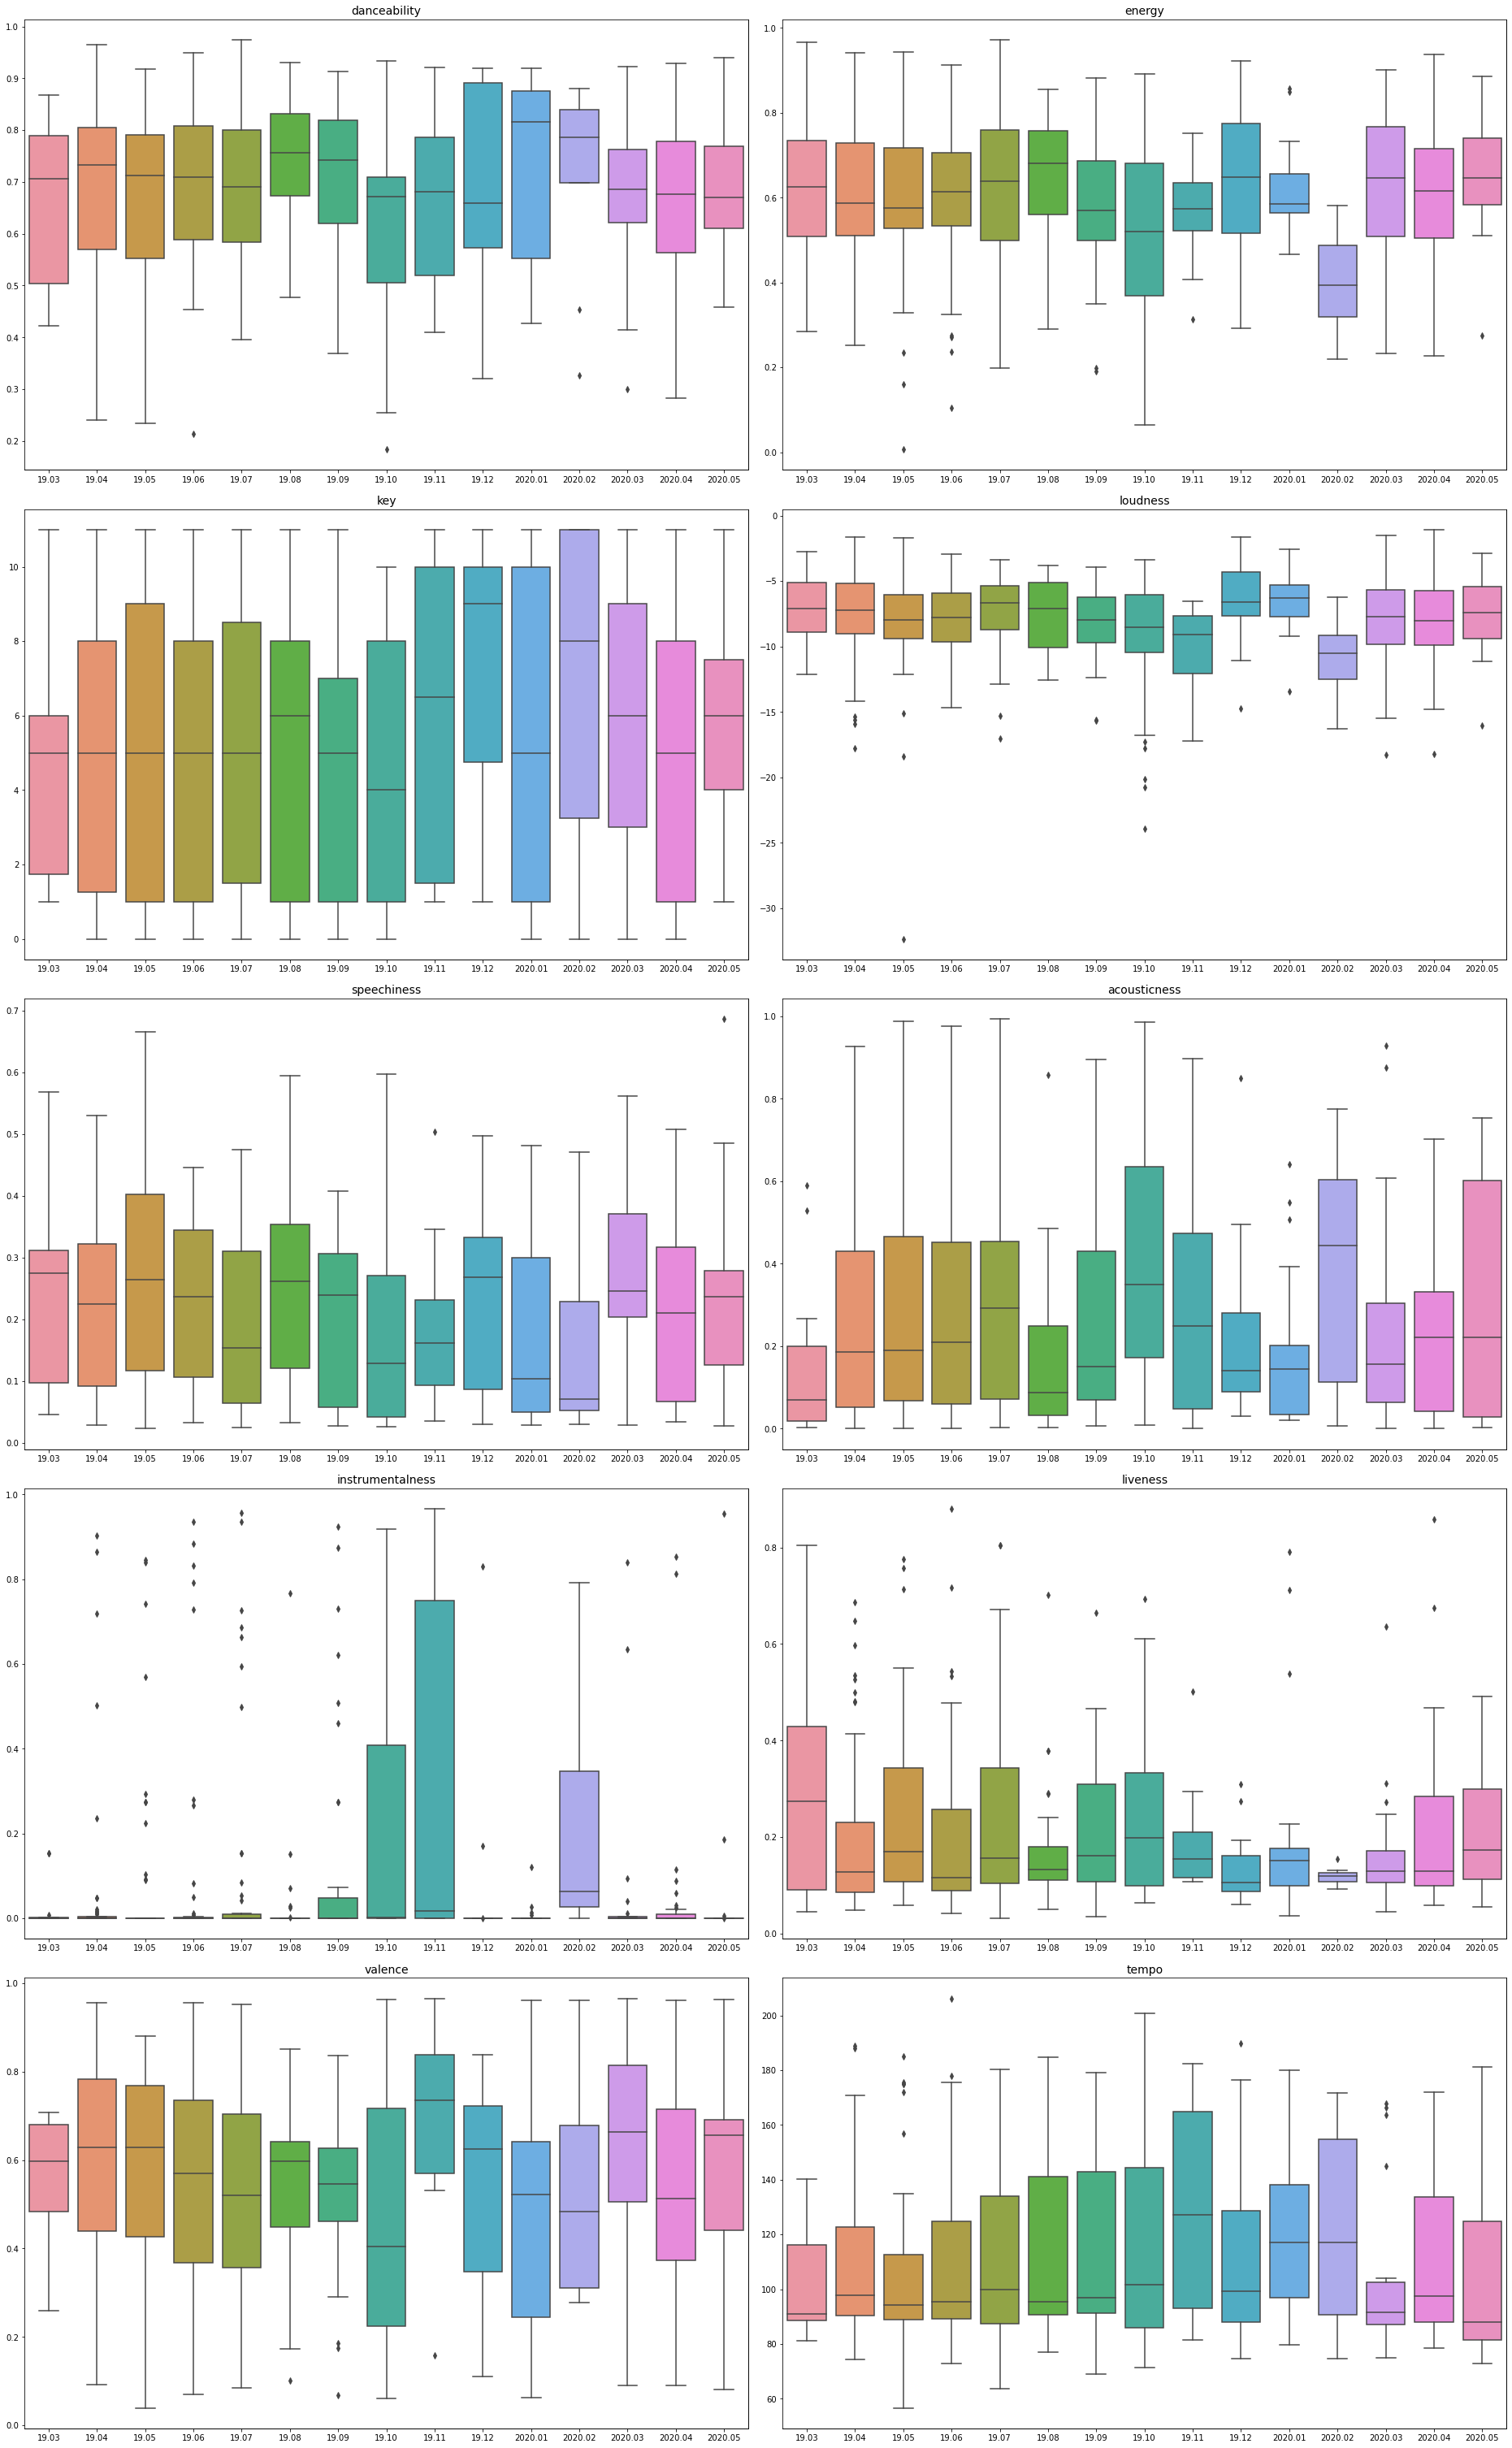

In [46]:
## Box plot per feature.
audio_features
nums = list(range(1, 11))

fig, axes = plt.subplots(nrows = 5, ncols = 2, figsize = (26, 42))

for ax, af, num in zip(axes.flatten(), audio_features, nums):
    ax = fig.add_subplot(5, 2, num)
    ax.set_title(f'{af}', size = 14)
    sns.boxplot(x = tracks_with_features_df['month'], y = tracks_with_features_df[af], order = playlist_names)
    ax.set_xlabel('')
    ax.set_ylabel('')
    
for ax in axes.flatten():
    ax.set_xticks([])
    ax.set_yticks([])
      
plt.tight_layout()    
plt.show()

### Finding Similar and Different Tracks
This section will use the tracks audio features and vectorize them in order to compute similarity scores between songs. These scores will then be used to discuss similarities and differences between each tracks.


In [47]:
encode_fields = [
    'danceability',
    'energy',
    'key',
    'loudness',
    'mode',
    'speechiness',
    'acousticness',
    'instrumentalness',
    'liveness',
    'valence',
    'tempo',
    'duration_ms',
    'time_signature',
]

def encode(row):
    return np.array([
        (row[k] - tracks_with_features_df[k].min()) / \
        (tracks_with_features_df[k].max() - tracks_with_features_df[k].min()) for k in encode_fields
    ]) 

tracks_with_features_encoded_df = tracks_with_features_df.assign(
    encoded = tracks_with_features_df.apply(encode, axis = 1)
)

In [48]:
tracks_with_features_encoded_df[['name', 'artist', 'encoded']]

,name,artist,encoded
0,Keep your Eyes on yours,50 Cent,"[0.7569620253164557, 0.4902927708596647, 1.0, ..."
1,Sandstorm (feat. JID),Mereba,"[0.5734177215189873, 0.5234444605598492, 0.181..."
2,Heat,50 Cent,"[0.41012658227848103, 0.9948200484843461, 0.54..."
3,Magic Stick,Lil' Kim,"[0.8417721518987342, 0.5099765866191492, 0.181..."
4,It's a Hit,50 Cent,"[0.8658227848101264, 0.2872386714460352, 0.909..."
...,...,...,...
440,Do It Again,Steely Dan,"[0.6303797468354431, 0.5493442181381183, 0.181..."
441,Rodman,Pardison Fontaine,"[0.9544303797468354, 0.5224084702567184, 0.090..."
442,Understanding (Comprehension),Madlib,"[0.3924050632911392, 0.7099227151233864, 0.454..."
443,The Percocet & Stripper Joint,Future,"[0.5582278481012658, 0.6840229575451174, 0.090..."


In [49]:
tracks_with_features_encoded_product_df  = tracks_with_features_encoded_df \
                                                .assign(temp = 0) \
                                                .merge(tracks_with_features_encoded_df.assign(temp = 0), \
                                                       on = 'temp', how = 'left') \
                                                .drop(columns = 'temp')

tracks_with_features_encoded_product_df = tracks_with_features_encoded_product_df[
    tracks_with_features_encoded_product_df['id_x'] != tracks_with_features_encoded_product_df['id_y']
]

tracks_with_features_encoded_product_df['merge_id'] = tracks_with_features_encoded_product_df \
                                                            .apply(lambda row: ''.join(sorted([row['id_x'], \
                                                                                               row['id_y']])), axis = 1)

tracks_with_features_encoded_product_df['distance'] = tracks_with_features_encoded_product_df \
                                                            .apply(lambda row: np.linalg.norm(row['encoded_x'] - \
                                                                                              row['encoded_y']), axis = 1)

### Similar Songs
This table shows the most similar songs discovered through the vectorization distance analysis. It is interpretable and understandable but domain authority on the actual tracks themselves is needed to confirm the results. 'Get Down' - Nas appears twice in the first three entries linked to close distance with 'Liquid Swords' - GZA and 'The Massacre' - 50 Cent. All three of these songs feature a heavy repeating beat with many words rapped in each verse. They engulf the mid-90s and early 2000s East Coast hip-hop scene.


In [50]:
## Similar songs
tracks_with_features_encoded_product_df \
    .sort_values('distance') \
    .drop_duplicates('merge_id') \
    [['name_x', 'artist_x', 'album_x', 'release_date_x', 'name_y', 'artist_y', 'album_y', 'release_date_y', 'distance']] \
    .head(10)

,name_x,artist_x,album_x,release_date_x,name_y,artist_y,album_y,release_date_y,distance
133545,YEAH RIGHT,Joji,YEAH RIGHT,2018-05-08,Yeah Right,Joji,Yeah Right,2018-05-08,0.011608
178982,Get Down,Nas,God's Son,2002-12-13,Investigative Reports,GZA,Liquid Swords,1995-01-01,0.160824
178895,Get Down,Nas,God's Son,2002-12-13,In My Hood,50 Cent,The Massacre,2005-03-03,0.170097
128247,Street Talkin',Slick Rick,The Art Of Storytelling,1999-01-01,Gangsta Boogie,J Dilla,The Diary,2016-04-15,0.178438
40945,Investigative Reports,GZA,Liquid Swords,1995-01-01,In My Hood,50 Cent,The Massacre,2005-03-03,0.194508
107635,Discipline,Gang Starr,Full Clip: A Decade Of Gang Starr,1999-07-13,Oh Boy,Cam’ron,Come Home With Me,2002-01-01,0.197822
167541,Wreckonize - Remix Vocal,Smif-N-Wessun,Wreckonize bw Sound Bwoy Bureill,2008-01-15,Judy,Al Green,Let's Stay Together,1972-06-06,0.198013
40824,The Jam,A Tribe Called Quest,"Beats, Rhymes & Life",1996-07-30,30 Something,JAY-Z,Kingdom Come,2006-11-21,0.203171
13886,Get Dis Money,Slum Village,"Fan-Tas-Tic, Vol. 2",2009-01-26,The Jam,A Tribe Called Quest,"Beats, Rhymes & Life",1996-07-30,0.203362
109800,Just How It Is,Young Thug,So Much Fun,2019-08-16,Medley: Intro,JAY-Z,In My Lifetime Vol.1,1997-11-04,0.206351


### Different Songs
The table below shows the most different songs through the feature vectorization analysis conducted above. This table is much more informative as it is quite easy to see how the song 'Make No Sense' - YoungBoy Never Broke Again differs from 'Suite bergamasque : 3. Clair de lune, a musical composition. It is also interesting but not surprising to see how the top ten most different songs all include either 'Clair de lune' or 'Piano Concerto No. 2'.

In [51]:
## Differnt songs
tracks_with_features_encoded_product_df \
    .sort_values('distance', ascending = False) \
    .drop_duplicates('merge_id') \
    [['artist_x', 'name_x', 'release_date_x', 'artist_y', 'name_y', 'release_date_y', 'distance']] \
    .head(10)

,artist_x,name_x,release_date_x,artist_y,name_y,release_date_y,distance
155864,YoungBoy Never Broke Again,Make No Sense,2019-10-11,Claude Debussy,Suite bergamasque : 3. Clair de lune,2014-09-12,2.661675
49064,J Dilla,Two Can Win,2006-02-07,Claude Debussy,Suite bergamasque : 3. Clair de lune,2014-09-12,2.598828
173219,Jack Harlow,WHATS POPPIN,2020-03-13,Claude Debussy,Suite bergamasque : 3. Clair de lune,2014-09-12,2.580968
149189,JAY-Z,This Life Forever,2010-11-22,Claude Debussy,Suite bergamasque : 3. Clair de lune,2014-09-12,2.567253
99100,Twista,Sunshine (feat. Anthony Hamilton),2004-01-27,Sergei Rachmaninoff,"Piano Concerto No. 2 in C Minor, Op. 18: I. Mo...",1999-10-12,2.553468
102909,Jaylib,Starz,2003-06-06,Claude Debussy,Suite bergamasque : 3. Clair de lune,2014-09-12,2.545284
51072,Claude Debussy,Suite bergamasque : 3. Clair de lune,2014-09-12,Giggs,Peligro,2017-10-06,2.532606
132724,Memphis Bleek,Dear Summer,2005-01-01,Claude Debussy,Suite bergamasque : 3. Clair de lune,2014-09-12,2.528431
68840,Nas,U Gotta Love It,2002-06-06,Sergei Rachmaninoff,"Piano Concerto No. 2 in C Minor, Op. 18: I. Mo...",1999-10-12,2.523364
154974,Roddy Ricch,The Box,2019-12-06,Claude Debussy,Suite bergamasque : 3. Clair de lune,2014-09-12,2.509879


### Most "Average" Songs
The table below shows the songs that have the least distance from every other song in the dataset. I can't make many conclusions from this table other than to say that there is a wide array of genres and song vibes in these 10 songs

In [52]:
## Average songs
tracks_with_features_encoded_product_df \
    .groupby(['artist_x', 'name_x', 'release_date_x']) \
    .sum()['distance'] \
    .reset_index() \
    .sort_values('distance') \
    .head(10)

,artist_x,name_x,release_date_x,distance
16,A$AP Ferg,"Dreams, Fairytales, Fantasies (feat. Brent Fai...",2019-08-16,446.817531
215,Kanye West,Paranoid,2008-01-01,452.155973
10,A Tribe Called Quest,Award Tour,1993-11-09,455.363808
258,Masta Ace,Crush Hour (feat. Pav Bundy),2012-07-17,455.682631
272,Mos Def,UMI Says,1999-10-12,455.853115
290,OutKast,Crumblin' Erb,1994-04-26,456.356648
326,Sango,Na Hora (feat. Faktiss & Chris MC Clenney),2015-11-12,458.954044
110,Domo Genesis,Wanderer (feat. Tay Walker),2016-03-25,462.077428
378,Tracey Lee,Keep Your Hands High,1997-06-06,462.603779
137,Gang Starr,Discipline,1999-07-13,463.813717


### Most "Extreme" Songs
These are the songs that have the largest distance from every other song in the dataset. 

In [53]:
## Extreme songs
tracks_with_features_encoded_product_df \
    .groupby(['artist_x', 'name_x', 'release_date_x']) \
    .sum()['distance'] \
    .reset_index() \
    .sort_values('distance', ascending = False) \
    .head(10)

,artist_x,name_x,release_date_x,distance
164,JAY-Z,Dead Presidents II,1997-04-09,2319.802241
323,"Royce Da 5'9""",Boom - Street Version,2000-06-06,2237.383634
287,Okvsho,Cariño,2018-07-06,2231.398050
17,A$AP Ferg,Floor Seats,2019-07-18,2229.054312
116,Dreamville,Under The Sun (with J. Cole & Lute feat. DaBaby),2019-07-05,2180.356593
202,Jorja Smith,Lifeboats (Freestyle),2018-06-08,2082.370703
251,Mac Miller,Jet Fuel,2018-08-03,2058.390913
65,Budgie,Touch Me 2,2018-02-14,1974.683283
252,Mac Miller,Senior Skip Day,2010-10-22,1911.765481
2,50 Cent,Hustler's Ambition,2007-01-01,1799.027555


## Dimensionality Reduction With Principal Component Analysis (PCA)
Scikit-Learns PCA class uses SVD decomposition to implement principal component analysis. Below, the code applies PCA to reduce the dimensionality of the dataset to two dimensions.

Given a collection of points in two, three, or higher dimensional space, a "best fitting" line can be defined as one that minimizes the average squared distance from a point to the line. The next best-fitting line can similarly be chosen from directions perpendicular to the first. Repeating this process yields an orthogonal basis in which different individual dimensions of the data are uncorrelated. These basis vectors are called principal components, and several related procedures principal component analysis (PCA).

PCA helps reduce the dimensions of the feature space being examined. By reducing the dimension of the feature space, there are fewer relationships between variables to consider and the model is less likely to overfit. Reducing the dimension of the feature space is called dimensionality reduction. There are two main categories used to achieve dimensionality reduction:

    Feature Elimination: The feature space is reduced by eliminating features. The advantages of this include simplicity 
    and maintaining interpretability of the variables. However, because features are dropped there is no information 
    gain from those features and therefore eliminate the benefits those features might add to the model.

    Feature Extraction: "New" independent variables are created which formed from combinations of the original 
    independent variables. These new independent variables are created in a specific way and are ordered by how 
    well they are able to predict the dependent variable. The most important new independent variables are kept 
    and the least important ones are dropped. Because the new independent variables are combinations of the old 
    variables, the technique still keeps the valuable parts of the old variables.

Principal component analysis is a technique for feature extraction and it combines the input variables in a specific way, and drops the least important combination variables while retaining the most important ones. Each of the "new" variables after PCA are all independent from one another. This is a major benefit because of the assumptions of linear models which require the independent variables to be independent of one another.

*There are 10 audio features and therefore dimensions we want to analyze, group by and visualise however, we cannot visualise something in 10 dimensional space. The best we can do is 3 dimensions, possibly 4 if you are extremely good and clever with your visualisations. Therefore we will use PCA to reduce our dimensions (features) to 3 and finally be able to visualise groupings and clusters allowing us to draw inference from what we see and find.*

This section will attempt to find clusters and groups of songs based on the audio features in my monthly playlist. Various unsupervised machine learning techniques will be used to reduce the dimensionality of the data in order to be able to represent the data in 2 and 3D plots.


In [54]:
## Import ML modules
import matplotlib.ticker as ticker
from sklearn import datasets, linear_model
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.manifold import TSNE

In [55]:
track_df = tracks_with_features_df.copy()

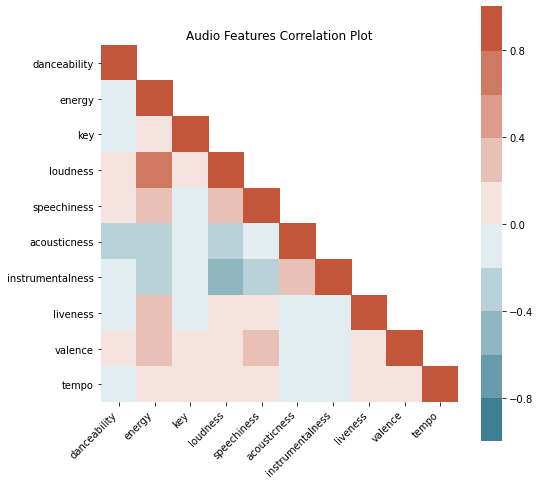

In [56]:
## Correlation matrix
corr = track_df[audio_features].corr()

## Create triangle df
np.tril(np.ones(corr.shape)).astype(np.bool)[:, :]
df_lt = corr.where(np.tril(np.ones(corr.shape)).astype(np.bool))

## Plot
plt.figure(figsize = (8, 8))
ax = sns.heatmap(df_lt, vmin = -1, vmax = 1, center = 0, cmap = sns.diverging_palette(220, 20, n = 10), square = True)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, horizontalalignment = 'right')
plt.title('Audio Features Correlation Plot')
plt.show()

In [57]:
## Scale features for analysis
features = audio_features + ['name', 'artist']

X = track_df[audio_features]

min_max_scaler = MinMaxScaler()
X_scaled = min_max_scaler.fit_transform(X)

In [58]:
## Initial PCA
pca = PCA(n_components = 2)
pca.fit(X_scaled)

pca1_var = round(pca.explained_variance_ratio_[0] * 100, 2)
pca2_var = round(pca.explained_variance_ratio_[1] * 100, 2)

print(f'{pca1_var} % of the datasets variance lies along the first principal component (PC).')
print(f'{pca2_var} % of the datasets variance lies along the second principal component (PC).')
print(f'{100 - (pca1_var + pca2_var)} % of the datasets variance lies on the remaining PCs')

24.17 % of the datasets variance lies along the first principal component (PC).
20.89 % of the datasets variance lies along the second principal component (PC).
54.94 % of the datasets variance lies on the remaining PCs


### Scree Plot
Instead of arbitrarily choosing the number of PCA dimensions to reduce down to, it is simpler to choose the number of dimensions that add up to a sufficiently large portion of the variance.

A scree plot is a line plot of the eigenvalues of factors or principal components in an analysis. The scree plot is used to determine the number of factors to retain in an exploratory factor analysis or principal components to keep in a principal component analysis.

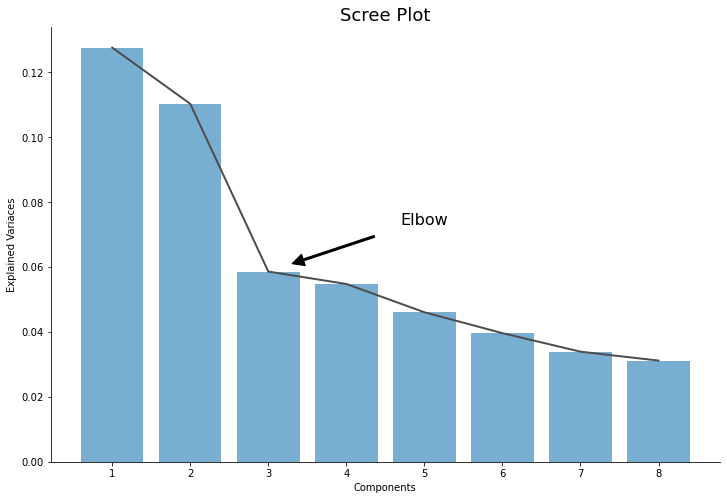

In [59]:
pca = PCA(n_components = 0.95)
X_reduced = pca.fit_transform(X_scaled)

## Plotting
plt.figure(figsize = (12, 8))
plt.plot(pca.explained_variance_, linewidth = 2, color = '#4d4d4d')
plt.bar(list(range(0, 8)), pca.explained_variance_, linewidth = 2, color = '#1f78b4', alpha = 0.6)
plt.xlabel('Components')
plt.ylabel('Explained Variaces')
plt.gca().spines['right'].set_color('none')
plt.gca().spines['top'].set_color('none')
plt.annotate(
    'Elbow', xy = (2, pca.explained_variance_[2]), xytext = (0.55, 0.55), textcoords = 'figure fraction', \
    fontsize = 16, color = 'black',
    arrowprops = dict(facecolor = 'black', shrink = 0.18, width = 2)
             )
plt.title('Scree Plot', size = 18)
plt.xticks(list(range(0, 8)), list(range(1, 9)))
plt.show()

The paper will explore the possible clustering and transformation with 3 PCA components, where the elbow is most prominent and is able to explain a larger amount of variance. 3 principal components also allows for 3Dimensional visualisations which are fun and interesting to work with.

In [60]:
## 3 PC
pca_3 = PCA(n_components = 3)
X_pca_3 = pca_3.fit_transform(X_scaled)

In [61]:
## PCA 3 DF
data_pca_3_df = pd.DataFrame(data = X_pca_3, columns = ['principal_component_1', 
                                                        'principal_component_2', 'principal_component_3'])
data_pca_3_df.tail()

,principal_component_1,principal_component_2,principal_component_3
440,0.119931,-0.188969,0.257797
441,0.377548,-0.164952,0.009567
442,0.127686,0.071507,-0.203271
443,0.874729,0.461582,0.099136
444,0.085875,-0.007729,-0.019761


In [62]:
## Expalined variance ratio
print(f'Explained variance per principal component: {pca_3.explained_variance_ratio_}')

Explained variance per principal component: [0.24170307 0.20889947 0.11101177]


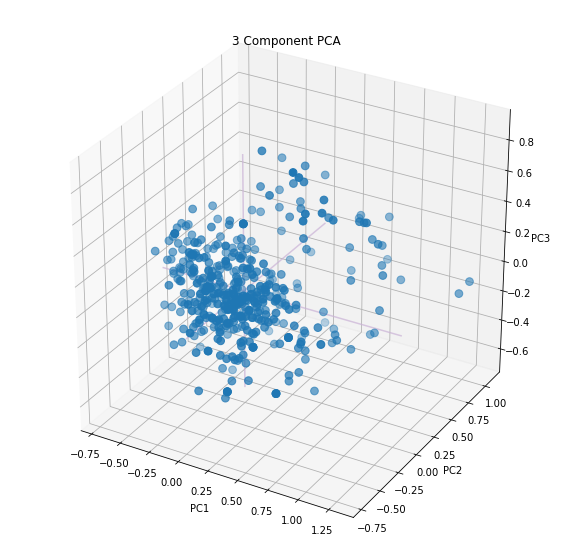

In [63]:
from matplotlib.colors import ListedColormap
#my_cmap = ListedColormap(sns.color_palette(colors).as_hex())


fig = plt.figure(figsize = (10, 10))
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(data_pca_3_df['principal_component_1'], data_pca_3_df['principal_component_2'], 
           data_pca_3_df['principal_component_3'], s = 60)

# make simple, bare axis lines through space:
xAxisLine = ((min(data_pca_3_df['principal_component_1']), max(data_pca_3_df['principal_component_1'])), (0, 0), (0,0))
ax.plot(xAxisLine[0], xAxisLine[1], xAxisLine[2], '#cab2d6', alpha = 0.7)
yAxisLine = ((0, 0), (min(data_pca_3_df['principal_component_2']), max(data_pca_3_df['principal_component_2'])), (0,0))
ax.plot(yAxisLine[0], yAxisLine[1], yAxisLine[2], '#cab2d6', alpha = 0.7)
zAxisLine = ((0, 0), (0,0), (min(data_pca_3_df['principal_component_3']), max(data_pca_3_df['principal_component_3'])))
ax.plot(zAxisLine[0], zAxisLine[1], zAxisLine[2], '#cab2d6', alpha = 0.7)

# label the axes
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
ax.set_title("3 Component PCA")

plt.show()

### Interactive Plots with Plotly
Plotly is a technical computing company headquartered in Montreal, Quebec, that develops online data analytics and visualization tools. plotly.py is an interactive, open-source, and browser-based graphing library for Python. Which has been built on top of plotly.js, plotly.py is a high-level, declarative charting library. plotly.js ships with over 30 chart types, including scientific charts, 3D graphs, statistical charts, SVG maps, financial charts, and more.

In [64]:
## Creating plot labels and pca_transformation
text1 = track_df['name'] + ' - ' + track_df['artist']
text2 = text1.values

pca = PCA(n_components = 3)
pca.fit(X_scaled)

X_pca = pca.transform(X_scaled)

df_pca = pd.DataFrame(X_pca)

The plot below is an interactive Plotly visualisation that provides a 3D representation of the data using the 3 principal components fitted above. By hovering on a datapoint the x, y, z (1st principal component value, 2ns principal component value and 3rd principal component value) along with the song and artist name will appear. If you are familiar with the songs in my library you will see how songs that "sound similar", in other words, come from the same genre, style, era and artists are grouped closer together while songs that vary in sound are further away.

In [65]:
import plotly.offline as py
py.init_notebook_mode(connected = True)
import plotly.graph_objs as go
import plotly.tools as tls

trace = go.Scatter3d(
    x = X_pca[:,0],
    y = X_pca[:,1],
    z = X_pca[:,2],
    text = text2,
    mode = "markers",
    marker = dict(
        size = 8,
        color = df_pca[0],
        colorscale = 'Portland',   # choose a colorscale
        opacity=0.8
    )
)

fig = go.Figure(data = [trace])

fig.update_layout(
    title = 'Interactive Tracks (3PCs) Visualised in 3D',
    autosize = False,
    width = 800,
    height = 800,
    margin = dict(
        l = 50,
        r = 50,
        b = 50,
        t = 50,
        pad = 4
    ),
    template = "plotly_dark" 
)

py.iplot(fig, filename = "test-graph")

## Clustering with K-Means
Clustering is one of the most common exploratory data analysis technique used to get an intuition about the structure of the data. It can be defined as the task of identifying subgroups in the data such that data points in the same subgroup (cluster) are very similar while data points in different clusters are very different. In other words, we try to find homogeneous subgroups within the data such that data points in each cluster are as similar as possible according to a similarity measure such as Euclidean-based distance or correlation-based distance. 

Unlike supervised learning, clustering is considered an unsupervised learning method since we don’t have the ground truth to compare the output of the clustering algorithm to the true labels to evaluate its performance. We only want to try to investigate the structure of the data by grouping the data points into distinct subgroups.

K-Means algorithm is an iterative algorithm that tries to partition the dataset into $K$ pre-defined distinct non-overlapping subgroups (clusters) where each data point belongs to only one group. It tries to make the intra-cluster data points as similar as possible while also keeping the clusters as different (far) as possible. It assigns data points to a cluster such that the sum of the squared distance between the data points and the cluster’s centroid (arithmetic mean of all the data points that belong to that cluster) is at the minimum. The less variation we have within clusters, the more homogeneous (similar) the data points are within the same cluster.
The way K-Means algorithm works is as follows:

1. Specify number of clusters $K$.
2. Initialize centroids by first shuffling the dataset and then randomly selecting K data points for the centroids without replacement.
3. Keep iterating until there is no change to the centroids. i.e assignment of data points to clusters isn’t changing.
        Compute the sum of the squared distance between data points and all centroids.
        Assign each data point to the closest cluster (centroid).
        Compute the centroids for the clusters by taking the average of the all data points that belong to each cluster.
        
The approach K-Means follows to solve the problem is called Expectation-Maximization. The E-step is assigning the data points to the closest cluster. The M-step is computing the centroid of each cluster.

The objective function is:

$$ J = \sum_{i = 1}^{m} \sum_{k = 1}{K} w_{ik} \lVert x^i - \mu_{k} \rVert ^2 $$

where $w_ik$ for data point $x_i$ if it belongs to cluster $k$; otherwise, $w_ik = 0$. $\mu_k$ is the centroid of $x_i$'s cluster.


In [66]:
## Import and load KMeans
from sklearn.cluster import KMeans
k = 3

pca_2 = PCA(n_components = 2)
X_pca_2 = pca_2.fit_transform(X_scaled)


kmeans = KMeans(n_clusters = k, random_state = 42)
clusters = kmeans.fit_predict(X_pca_2)

In [67]:
print(f'The algorithm found the following 3 centroids')
kmeans.cluster_centers_

The algorithm found the following 3 centroids


array([[ 0.20283839, -0.29240185],
       [-0.31909654,  0.06804383],
       [ 0.33210206,  0.45516367]])

In [68]:
print(f'With a K values of {k} the models intertia is {kmeans.inertia_}')

With a K values of 3 the models intertia is 37.75751829336565


### K-Means Inertia
The K-Means algorithm clusters data by trying to separate samples in $n$ groups of equal variance, minimizing a criterion known as the inertia or within-cluster sum-of-squares (see below).

The K-means algorithm aims to choose centroids that minimize the inertia, or within-cluster sum-of-squares criterion. Inertia can be recognized as a measure of how internally coherent clusters are. However, it suffers from two main drawbacks:

    Inertia makes the assumption that clusters are convex and isotropic. It responds poorly to elongated clusters, 
    or manifolds with irregular shapes. This is not the case in this example, as clusters observed in the 2D plot 
    are not of irregular shapes

    Inertia is not a normalized metric: we just know that lower values are better and zero is optimal. But in very 
    high-dimensional spaces, Euclidean distances tend to become inflated (this is an instance of the so-called 
    “curse of dimensionality”). Running a dimensionality reduction algorithm such as Principal Component Analysis 
    (PCA), as has been done above, prior to k-means clustering can alleviate this problem and speed up the computations.
   
We cannot simply take the value of $k$ that minimizes the inertia, since it keeps getting lower as we increase $k$. Indeed, the more clusters there are, the closer each instance will be to its closest centroid, and therefore the lower the inertia will be. However, we can plot the inertia as a function of $k$ and analyze the resulting curve:


In [69]:
## Inertias for varying K's
kmeans_per_k = [KMeans(n_clusters = k, random_state = 42).fit(X_pca_2) for k in range(1, 30)]
inertias = [model.inertia_ for model in kmeans_per_k]

k = 1
for inertia in inertias:
    print(f'With a K values of {k} the models intertia is {inertia}')
    k += 1

With a K values of 1 the models intertia is 105.67341421371216
With a K values of 2 the models intertia is 63.95605106481495
With a K values of 3 the models intertia is 37.75751829336565
With a K values of 4 the models intertia is 28.858884392555424
With a K values of 5 the models intertia is 22.795854309665714
With a K values of 6 the models intertia is 17.353957739157543
With a K values of 7 the models intertia is 14.58497768647571
With a K values of 8 the models intertia is 12.830216009450943
With a K values of 9 the models intertia is 11.279055593865959
With a K values of 10 the models intertia is 10.025036729891111
With a K values of 11 the models intertia is 8.958425389565647
With a K values of 12 the models intertia is 8.027009446608892
With a K values of 13 the models intertia is 7.562299648733855
With a K values of 14 the models intertia is 7.015407956095052
With a K values of 15 the models intertia is 6.440978352392754
With a K values of 16 the models intertia is 5.8829853661

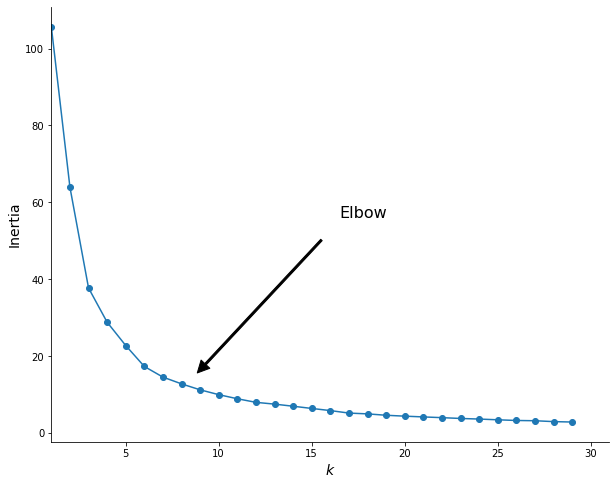

In [70]:
## Plotting
plt.figure(figsize = (10, 8))
plt.plot(range(1, 30), inertias, "bo-", color = '#1f78b4')
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
plt.annotate(
    'Elbow', xy = (8, inertias[8]), xytext = (0.55, 0.55), textcoords = 'figure fraction', fontsize = 16,
    arrowprops = dict(facecolor = 'black', shrink = 0.1, width = 2)
             )
plt.xlim([1, 31])
plt.gca().spines['right'].set_color('none')
plt.gca().spines['top'].set_color('none')
plt.show()

As can be seen, there is an elbow at $k=8$ or so, which means that less clusters than that would be bad, and more clusters would not help much and might cut clusters in half. So $k=8$ is a pretty good choice. Of course in this example it is not perfect since it most likely means that two or more blobs will be considered as just a single cluster, but it's a pretty good clustering nonetheless. Other techniques will be used to further validate our value for $k$ below.

In [71]:
## Function used to plot data, centroids and decision boundries (HOML)
def plot_data(X):
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)

def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=30, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=50, linewidths=50,
                color=cross_color, zorder=11, alpha=1)

def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True,
                             show_xlabels=True, show_ylabels=True, ax=ax):
    mins = X.min(axis=0) - 1
    maxs = X.max(axis=0) + 1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                cmap="Pastel2")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                linewidths=1, colors='k')
    plot_data(X)
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)

    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)

### An Optimal $k$
    "the optimal choice of $k$ will strike a balance between maximum compression of the data using a single cluster, and 
    maximum accuracy by assigning each data point to its own cluster."

Another approach is to look at the silhouette score, which is the mean silhouette coefficient over all the instances. An instance's silhouette coefficient is equal to $(b - a)/\max(a, b)$ where $a$ is the mean distance to the other instances in the same cluster (it is the mean intra-cluster distance), and $b$ is the mean nearest-cluster distance, that is the mean distance to the instances of the next closest cluster (defined as the one that minimizes $b$, excluding the instance's own cluster). The silhouette coefficient can vary between -1 and +1: a coefficient close to +1 means that the instance is well inside its own cluster and far from other clusters, while a coefficient close to 0 means that it is close to a cluster boundary, and finally a coefficient close to -1 means that the instance may have been assigned to the wrong cluster.

Let's plot the silhouette score as a function of $k$:

In [72]:
## Silhouette score
from sklearn.metrics import silhouette_score

print(silhouette_score(X_pca_3, kmeans.labels_))

silhouette_scores = [silhouette_score(X_pca_3, model.labels_)
                     for model in kmeans_per_k[1:11]]

0.34641185162436045


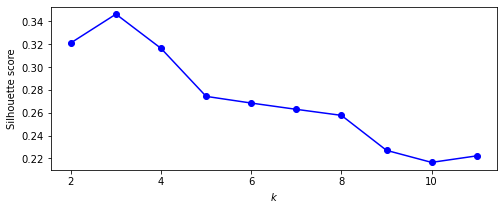

In [73]:
## Plotting the silhouette scores
plt.figure(figsize=(8, 3))
plt.plot(range(2, 12), silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=10)
plt.ylabel("Silhouette score", fontsize=10)
#save_fig("silhouette_score_vs_k_diagram")
plt.show()

### Silhouette Diagram
An even more informative visualisation is obtained when each instances silhouette coefficient is plotted, sorted by the cluster the instance is assigned to and by the value of the coefficient. This is called a silhouette diagram. Each diagram contains one knife shape per cluster. The shape's height indicates the number of instances the cluster contains, and its width represents the sorted silhouette coefficients of the instances in the cluster (the wider the better). The dashed lines indicates the mean silhouette coefficient


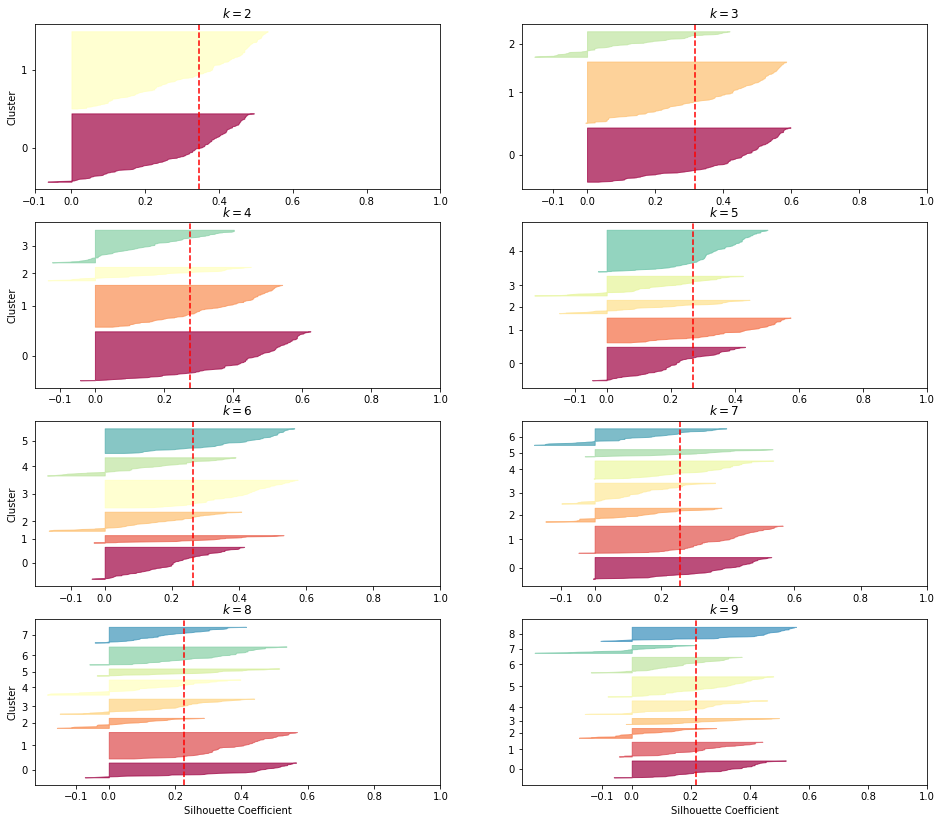

In [74]:
## Plotting the Sillhouette Diagram
from sklearn.metrics import silhouette_samples
from matplotlib.ticker import FixedLocator, FixedFormatter

plt.figure(figsize=(16, 14))

for k in (2, 3, 4, 5, 6, 7, 8, 9):
    plt.subplot(4, 2, k - 1)
    
    y_pred = kmeans_per_k[k - 1].labels_
    silhouette_coefficients = silhouette_samples(X_pca_3, y_pred)

    padding = len(X_pca_3) // 30
    pos = padding
    ticks = []
    for i in range(k):
        coeffs = silhouette_coefficients[y_pred == i]
        coeffs.sort()

        color = mpl.cm.Spectral(i / k)
        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ticks.append(pos + len(coeffs) // 2)
        pos += len(coeffs) + padding

    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
    if k in (2, 4, 6, 8):
        plt.ylabel("Cluster")
    
    if k in (2, 3, 4, 5, 6, 7, 8, 9):
        plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
    else:
        plt.tick_params(labelbottom=False)

    if k in (8, 9):
        plt.xlabel("Silhouette Coefficient")

    plt.axvline(x=silhouette_scores[k - 1], color="red", linestyle="--")
    plt.title("$k={}$".format(k), fontsize=12)

#save_fig("silhouette_analysis_diagram")
plt.show()

The vertical dashed lines represent the silhouettes score for each number of clusters. When most of the instances in a cluster have a lower coefficient than this score (i.e if many instances stop short of the dashed line, ending to the left of it), then the cluster is rather bad since this means its instances are much too close to the other clusters. 

### Voronoi Diagram for $K = 8$
A Voronoi diagram is a partition of a plane into regions close to each of a given set of objects. In the simplest case, these objects are just finitely many points in the plane. For each seed there is a corresponding region consisting of all points of the plane closer to that seed than to any other. This makes it well suited to plot the centroids, data points and decision boundaries for the K-Means model.

This section below will show the and find the clusters for the tracks in my playlist based on the audio features that have been transformed into *2* principal components. A following section will take this analysis a step further.


In [75]:
## K = 8 with 2 PCs
kmeans = KMeans(n_clusters = 8, random_state = 42)
clusters = kmeans.fit_predict(X_pca_2)

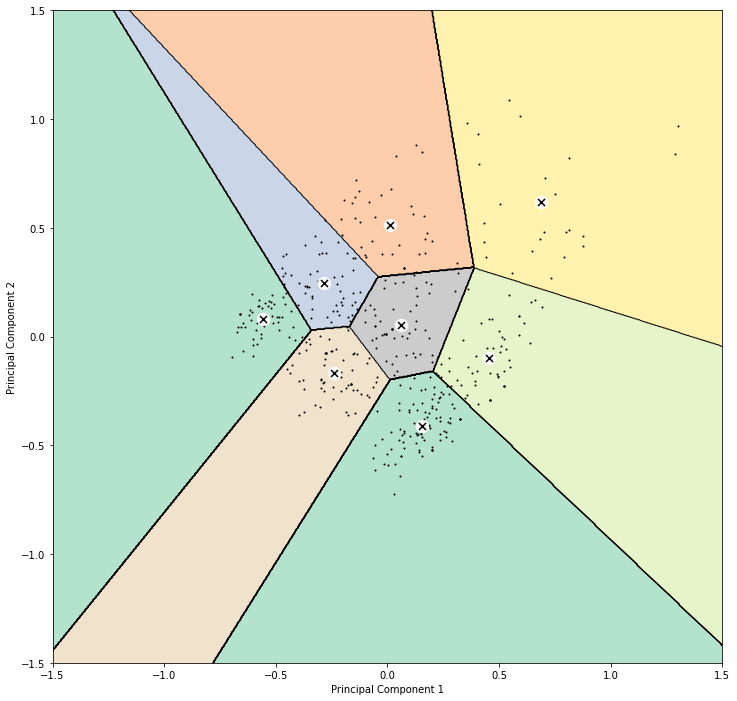

In [76]:
## Plotting Voronoi
plt.figure(figsize = (12, 12))
plot_decision_boundaries(kmeans, X_pca_2)

plt.xlabel('Principal Component 1', size = 10)
plt.ylabel('Principal Component 2', rotation = 90,  size = 10)
plt.xlim([-1.5, 1.5])
plt.ylim([-1.5, 1.5])
plt.show()

Because clustering is a unsupervised machine learning technique, we don't have the value to what these clusters truly mean. The model is able to separate and form sub-groups of the data but it is up to the user to interpret the results and try to find a viable relationship that link instances in one cluster to other instances in the same cluster. This can be an extremely challenging task depending on the data that is being studied at hand, the amount of features considered and various statistical measures of the data.

This section below creates a way to form a data frame that joins the song and artist name with the respective cluster it was assigned to. It also joins all the values of the audio features studied so that we can begin to try to understand why songs were assigned to their cluster and not others.

In [77]:
## Create dataframe with cluster labels
cluster_map = pd.DataFrame()
cluster_map['data_index'] = track_df[features].index.values
cluster_map['cluster'] = kmeans.labels_

In [78]:
cluster_label_df = pd.concat([track_df[features], cluster_map['cluster']], axis = 1)

In [79]:
def ClusterIndicesNumpy(clustNum, labels_array): #numpy 
    return np.where(labels_array == clustNum)[0]

In [80]:
## Index of all datapoints in cluster 2
ClusterIndicesNumpy(2, kmeans.labels_)

array([ 74,  80,  88,  93, 119, 131, 165, 167, 168, 169, 170, 177, 185,
       207, 208, 212, 219, 232, 244, 282, 283, 285, 290, 291, 293, 305,
       306, 312, 314, 317, 325, 360, 363, 367, 368, 371, 431], dtype=int64)

In [81]:
cluster_label_df

,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,name,artist,cluster
0,0.782,0.480,11,-12.113,0.3610,0.00772,0.000001,0.0951,0.6340,90.688,Keep your Eyes on yours,50 Cent,0
1,0.637,0.512,2,-10.027,0.0978,0.59000,0.000464,0.0712,0.3300,109.492,Sandstorm (feat. JID),Mereba,4
2,0.508,0.967,6,-2.777,0.5680,0.26700,0.000000,0.3610,0.6790,81.167,Heat,50 Cent,6
3,0.849,0.499,2,-7.872,0.2710,0.11700,0.000050,0.2680,0.5040,92.982,Magic Stick,Lil' Kim,1
4,0.868,0.284,10,-11.456,0.3000,0.00310,0.000007,0.0458,0.2600,91.030,It's a Hit,50 Cent,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
440,0.682,0.537,2,-10.254,0.0323,0.21800,0.000031,0.0556,0.9630,124.574,Do It Again,Steely Dan,1
441,0.938,0.511,1,-4.890,0.1230,0.36800,0.000000,0.0814,0.3420,130.053,Rodman,Pardison Fontaine,4
442,0.494,0.692,5,-4.078,0.0918,0.32700,0.006220,0.3300,0.2350,86.752,Understanding (Comprehension),Madlib,7
443,0.625,0.667,1,-5.875,0.1310,0.75400,0.954000,0.1350,0.0805,80.046,The Percocet & Stripper Joint,Future,5


### $k = 8$ with 3 Principal Components
At this point it takes human intervention to begin to make sense of the clusters. The songs have been grouped into 8 different clusters using the K-Means algorithm. The algo utilized 2 PCA components in order to make this clustering. This next section will run the same K-Means, k = 8, model but this time the model will utilise a third PCA component. The addition of a third principal component will add to the total explained variance of the PCA and should help with the clustering as the K-Means model will now have 3 features (not 2) to work with. The centroids, data and decision boundaries will be visualised in an interactive 3D space.

In [82]:
## Creating plot labels and pca_transformation
pca = PCA(n_components = 3)
pca.fit(X_scaled)

X_pca_3 = pca.transform(X_scaled)

df_pca = pd.DataFrame(X_pca_3)

In [83]:
kmeans = KMeans(n_clusters = 8, random_state = 42)
clusters = kmeans.fit_predict(X_pca_3)

In [84]:
## Create dataframe with cluster labels
cluster_map = pd.DataFrame()
cluster_map['data_index'] = track_df[features].index.values
cluster_map['cluster'] = kmeans.labels_

cluster_label_3d_df = pd.concat([df_pca, cluster_map['cluster']], axis = 1)

The below table shows the song and artist name along with cluster it has been assigned to and its respective value for each of the three principal components. This table will be visualised in an interactive plot below.

In [85]:
song_name_df = pd.DataFrame(text2)

cluster_label_3d_df  = pd.concat([cluster_label_3d_df, song_name_df], axis = 1)
cluster_label_3d_df.columns = ['0', '1', '2', 'cluster', 'name']
cluster_label_3d_df

,0,1,2,cluster,name
0,-0.529461,0.164352,0.138143,7,Keep your Eyes on yours - 50 Cent
1,0.455931,0.080688,-0.199125,6,Sandstorm (feat. JID) - Mereba
2,-0.326317,-0.312596,-0.282631,4,Heat - 50 Cent
3,0.154215,-0.303109,0.125726,1,Magic Stick - Lil' Kim
4,-0.272292,0.265160,0.113428,7,It's a Hit - 50 Cent
...,...,...,...,...,...
440,0.119931,-0.188969,0.257797,1,Do It Again - Steely Dan
441,0.377548,-0.164952,0.009567,6,Rodman - Pardison Fontaine
442,0.127686,0.071507,-0.203271,6,Understanding (Comprehension) - Madlib
443,0.874729,0.461582,0.099136,2,The Percocet & Stripper Joint - Future


In [86]:
## Visualising cluster shapes in 3D
cluster1 = cluster_label_3d_df.loc[cluster_label_3d_df['cluster'] == 0]
cluster2 = cluster_label_3d_df.loc[cluster_label_3d_df['cluster'] == 1]
cluster3 = cluster_label_3d_df.loc[cluster_label_3d_df['cluster'] == 2]
cluster4 = cluster_label_3d_df.loc[cluster_label_3d_df['cluster'] == 3]
cluster5 = cluster_label_3d_df.loc[cluster_label_3d_df['cluster'] == 4]
cluster6 = cluster_label_3d_df.loc[cluster_label_3d_df['cluster'] == 5]
cluster7 = cluster_label_3d_df.loc[cluster_label_3d_df['cluster'] == 6]
cluster8 = cluster_label_3d_df.loc[cluster_label_3d_df['cluster'] == 7]

## Scatters
scatter1 = dict(
    mode = "markers",
    name = "Cluster 1",
    type = "scatter3d",    
    x = cluster1.as_matrix()[:,0], y = cluster1.as_matrix()[:,1], z = cluster1.as_matrix()[:,2], \
    text = cluster1.as_matrix()[:,4],
    marker = dict( size=2, color='#a6cee3')
)
scatter2 = dict(
    mode = "markers",
    name = "Cluster 2",
    type = "scatter3d",    
    x = cluster2.as_matrix()[:,0], y = cluster2.as_matrix()[:,1], z = cluster2.as_matrix()[:,2], \
    text = cluster2.as_matrix()[:,4],
    marker = dict( size=2, color='#1f78b4')
)
scatter3 = dict(
    mode = "markers",
    name = "Cluster 3",
    type = "scatter3d",    
    x = cluster3.as_matrix()[:,0], y = cluster3.as_matrix()[:,1], z = cluster3.as_matrix()[:,2], \
    text = cluster3.as_matrix()[:,4],
    marker = dict( size=2, color='#b2df8a')
)
scatter4 = dict(
    mode = "markers",
    name = "Cluster 4",
    type = "scatter3d",    
    x = cluster4.as_matrix()[:,0], y = cluster4.as_matrix()[:,1], z = cluster4.as_matrix()[:,2], \
    text = cluster4.as_matrix()[:,4],
    marker = dict( size=2, color='#33a02c')
)
scatter5 = dict(
    mode = "markers",
    name = "Cluster 5",
    type = "scatter3d",    
    x = cluster5.as_matrix()[:,0], y = cluster5.as_matrix()[:,1], z = cluster5.as_matrix()[:,2], \
    text = cluster5.as_matrix()[:,4],
    marker = dict( size=2, color='#fb9a99')
)
scatter6 = dict(
    mode = "markers",
    name = "Cluster 6",
    type = "scatter3d",    
    x = cluster6.as_matrix()[:,0], y = cluster6.as_matrix()[:,1], z = cluster6.as_matrix()[:,2], \
    text = cluster6.as_matrix()[:,4],
    marker = dict( size=2, color='#e31a1c')
)     
scatter7 = dict(
    mode = "markers",
    name = "Cluster 7",
    type = "scatter3d",    
    x = cluster7.as_matrix()[:,0], y = cluster7.as_matrix()[:,1], z = cluster7.as_matrix()[:,2], \
    text = cluster7.as_matrix()[:,4],
    marker = dict( size=2, color='#fdbf6f')
)
scatter8 = dict(
    mode = "markers",
    name = "Cluster 8",
    type = "scatter3d",    
    x = cluster8.as_matrix()[:,0], y = cluster8.as_matrix()[:,1], z = cluster8.as_matrix()[:,2], \
    text = cluster8.as_matrix()[:,4],
    marker = dict( size=2, color='#ff7f00')
)
 
## Clusters 
cluster1 = dict(
    alphahull = 5,
    name = "Cluster 1",
    opacity = .1,
    type = "mesh3d",    
    x = cluster1.as_matrix()[:,0], y = cluster1.as_matrix()[:,1], z = cluster1.as_matrix()[:,2], \
    text = cluster1.as_matrix()[:,4],
    color='#a6cee3', showscale = True
)
cluster2 = dict(
    alphahull = 5,
    name = "Cluster 2",
    opacity = .1,
    type = "mesh3d",    
    x = cluster2.as_matrix()[:,0], y = cluster2.as_matrix()[:,1], z = cluster2.as_matrix()[:,2], \
    text = cluster2.as_matrix()[:,4],
    color='#1f78b4', showscale = True
)
cluster3 = dict(
    alphahull = 5,
    name = "Cluster 3",
    opacity = .1,
    type = "mesh3d",    
    x = cluster3.as_matrix()[:,0], y = cluster3.as_matrix()[:,1], z = cluster3.as_matrix()[:,2], \
    text = cluster3.as_matrix()[:,4],
    color='#b2df8a', showscale = True
)
cluster4 = dict(
    alphahull = 5,
    name = "Cluster 4",
    opacity = .1,
    type = "mesh3d",    
    x = cluster4.as_matrix()[:,0], y = cluster4.as_matrix()[:,1], z = cluster4.as_matrix()[:,2], \
    text = cluster4.as_matrix()[:,4],
    color='#33a02c', showscale = True
)
cluster5 = dict(
    alphahull = 5,
    name = "Cluster 5",
    opacity = .1,
    type = "mesh3d",    
    x = cluster5.as_matrix()[:,0], y = cluster5.as_matrix()[:,1], z = cluster5.as_matrix()[:,2], \
    text = cluster5.as_matrix()[:,4],
    color='#fb9a99', showscale = True
)
cluster6 = dict(
    alphahull = 5,
    name = "Cluster 6",
    opacity = .1,
    type = "mesh3d",    
    x = cluster6.as_matrix()[:,0], y = cluster6.as_matrix()[:,1], z = cluster6.as_matrix()[:,2], \
    text = cluster6.as_matrix()[:,4],
    color='#e31a1c', showscale = True
)
cluster7 = dict(
    alphahull = 5,
    name = "Cluster 7",
    opacity = .1,
    type = "mesh3d",    
    x = cluster7.as_matrix()[:,0], y = cluster7.as_matrix()[:,1], z = cluster7.as_matrix()[:,2], \
    text = cluster7.as_matrix()[:,4],
    color='#fdbf6f', showscale = True
)
cluster8 = dict(
    alphahull = 5,
    name = "Cluster 8",
    opacity = .1,
    type = "mesh3d",    
    x = cluster8.as_matrix()[:,0], y = cluster8.as_matrix()[:,1], z = cluster8.as_matrix()[:,2], \
    text = cluster8.as_matrix()[:,4],
    color='#ff7f00', showscale = True
)

layout = dict(
    title = 'Interactive Track Clusters in 3D',
    scene = dict(
        xaxis = dict( zeroline=True ),
        yaxis = dict( zeroline=True),
        zaxis = dict( zeroline=True),
    ),
    autosize = False,
    width = 800,
    height = 800,
    margin = dict(
        l = 50,
        r = 50,
        b = 50,
        t = 50,
        pad = 4
    ),
    template = "plotly_white" 
)
fig = dict( data=[scatter1, scatter2, scatter3, scatter4, scatter5, scatter6, scatter7, scatter8, \
                  cluster1, cluster2, cluster3, cluster4, cluster5, cluster6, cluster7, cluster8], layout = layout)


# Use py.iplot() for IPython notebook
py.iplot(fig, filename='mesh3d_sample')


# fig = go.Figure(data = [trace])



### Cluster Analysis
The hard part now is to begin to try to understand why these clusters have been formed how they have. This section outlines various steps needed to begin to make sense of the K-Means output. That is looking at track genres in each cluster and the artists who make up the tracks in each cluster.

In [87]:
## Create DF
cluster_analysis_df = pd.concat([cluster_label_3d_df.drop('name', axis = 1), \
                                 tracks_with_features_df[['id', 'name', 'artist']], ], axis = 1)
cluster_analysis_df.drop(['0', '1', '2'], axis = 1, inplace = True)
cluster_analysis_df = cluster_analysis_df[['id', 'name', 'artist', 'cluster']]
cluster_analysis_df.tail()

,id,name,artist,cluster
440,2BstRQGodshjGpeDGQiNgo,Do It Again,Steely Dan,1
441,65rrcsD9FKM1RPDNCXMAdX,Rodman,Pardison Fontaine,6
442,63rbs4sRRCJdQDKTWTrJ25,Understanding (Comprehension),Madlib,6
443,1yCVsVH2hQ72SxNI8QTDaB,The Percocet & Stripper Joint,Future,2
444,1raEsDsulUbqfLvOC4AjUB,Monday,DJ Max Star,4


In [88]:
## Function to count genre of artists in the cluster
def cluster_genre(cluster):

    cluster = cluster_analysis_df.loc[cluster_analysis_df['cluster'] == cluster - 1]
    cluster_genres = dict()
    for track_id in cluster['id']:
        artist_id = sp.track(track_id)['artists'][0]['id']
        genres = sp.artist(artist_id)['genres']
        for genre in genres: 
            if genre in cluster_genres:
                cluster_genres[genre] += 1
            else:
                cluster_genres[genre] = 1

    cluster_df = pd.DataFrame.from_dict(cluster_genres, orient = 'index')
    cluster_df.reset_index(inplace = True)
    cluster_df.columns = ['genre', 'count']

    return cluster_df.sort_values('count', ascending = False).head(20)

In [89]:
cluster1_genre_df = cluster_genre(1)
cluster2_genre_df = cluster_genre(2)
cluster3_genre_df = cluster_genre(3)
cluster4_genre_df = cluster_genre(4)
cluster5_genre_df = cluster_genre(5)
cluster6_genre_df = cluster_genre(6)
cluster7_genre_df = cluster_genre(7)
cluster8_genre_df = cluster_genre(8)

In [90]:
print('\n', f"The top 5 genres in cluster 1 are: {cluster1_genre_df['genre'].iloc[0]}, {cluster1_genre_df['genre'].iloc[1]}," 
      f" {cluster1_genre_df['genre'].iloc[2]}, {cluster1_genre_df['genre'].iloc[3]}, and {cluster1_genre_df['genre'].iloc[4]}")
      
print('\n', f"The top 5 genres in cluster 2 are: {cluster2_genre_df['genre'].iloc[0]}, {cluster2_genre_df['genre'].iloc[1]}," 
      f" {cluster2_genre_df['genre'].iloc[2]}, {cluster2_genre_df['genre'].iloc[3]}, and {cluster2_genre_df['genre'].iloc[4]}")
      
print('\n', f"The top 5 genres in cluster 3 are: {cluster3_genre_df['genre'].iloc[0]}, {cluster3_genre_df['genre'].iloc[1]}," 
      f" {cluster3_genre_df['genre'].iloc[2]}, {cluster3_genre_df['genre'].iloc[3]}, and {cluster3_genre_df['genre'].iloc[4]}")
      
print('\n', f"The top 5 genres in cluster 4 are: {cluster4_genre_df['genre'].iloc[0]}, {cluster4_genre_df['genre'].iloc[1]}," 
      f" {cluster4_genre_df['genre'].iloc[2]}, {cluster4_genre_df['genre'].iloc[3]}, and {cluster4_genre_df['genre'].iloc[4]}")

print('\n', f"The top 5 genres in cluster 5 are: {cluster5_genre_df['genre'].iloc[0]}, {cluster5_genre_df['genre'].iloc[1]}," 
      f" {cluster5_genre_df['genre'].iloc[2]}, {cluster5_genre_df['genre'].iloc[3]}, and {cluster5_genre_df['genre'].iloc[4]}")

print('\n', f"The top 5 genres in cluster 6 are: {cluster6_genre_df['genre'].iloc[0]}, {cluster6_genre_df['genre'].iloc[1]}," 
      f" {cluster6_genre_df['genre'].iloc[2]}, {cluster6_genre_df['genre'].iloc[3]}, and {cluster6_genre_df['genre'].iloc[4]}")
      
print('\n', f"The top 5 genres in cluster 7 are: {cluster7_genre_df['genre'].iloc[0]}, {cluster7_genre_df['genre'].iloc[1]}," 
      f" {cluster7_genre_df['genre'].iloc[2]}, {cluster7_genre_df['genre'].iloc[3]}, and {cluster7_genre_df['genre'].iloc[4]}")
      
print('\n', f"The top 5 genres in cluster 8 are: {cluster8_genre_df['genre'].iloc[0]}, {cluster8_genre_df['genre'].iloc[1]}," 
      f" {cluster8_genre_df['genre'].iloc[2]}, {cluster8_genre_df['genre'].iloc[3]}, and {cluster8_genre_df['genre'].iloc[4]}")


 The top 5 genres in cluster 1 are: rap, hip hop, alternative hip hop, southern hip hop, and underground hip hop

 The top 5 genres in cluster 2 are: rap, hip hop, pop rap, gangster rap, and east coast hip hop

 The top 5 genres in cluster 3 are: lo-fi beats, jazz funk, jazz boom bap, funk, and indie soul

 The top 5 genres in cluster 4 are: hip hop, rap, pop rap, southern hip hop, and trap

 The top 5 genres in cluster 5 are: rap, hip hop, pop rap, gangster rap, and east coast hip hop

 The top 5 genres in cluster 6 are: chillhop, jazz boom bap, funk, soul, and indie soul

 The top 5 genres in cluster 7 are: alternative r&b, hip hop, rap, pop, and classic rock

 The top 5 genres in cluster 8 are: hip hop, rap, east coast hip hop, gangster rap, and pop rap


Spotify, for whatever reason, does not let you have access to the genre of a song. It will provide you with the audio features but it does not want to give us how it has classified the song based on genres. This might be because they don't want users to create their own discover weekly-esque playlists based on song genres through their API. It is a shame they do not because it would provide solid detail and understanding to the current analysis we are doing and would allow for many other things to be played with.

They also don't truly provide a genre for an artists album... so once again we need to climb up into a higher level losing granularity to get our genres. The closest we can get to finding a songs genre on Spotify is through how they have classified the artists genre. This is very top level, because any music fan will appreciate that artists don't stick to one true genre. Their releases as their career progresses are shaped and changed by what they have lived and feel and this is always reflected in slight (sometimes extreme) changes in genre. Songs on albums themselves might contain various different genres. Alas, we will continue to analyze our clusters with what we can. 

Looking at what is show above, it seems that Cluster 1, 2, 4, 5 and 8 are quite similar. The artists in these clusters favor hip-hop, rap and variations of the two ranging from east coast hip hop to gangster rap to southern hip hop.
Cluster 7 seems to contain some general hip hop and rap along with alternative r&b, classic rock, and pop. Something quite different to the rap heavy style of the first clusters mentioned. 
Finally Cluster 3 and 6 favor the lo-fi, chill hop beats which make up my study playlists and easy listening moods.

In [91]:
## Function to extract artists in cluster
def cluster_artist(cluster):

    cluster = cluster_analysis_df.loc[cluster_analysis_df['cluster'] == cluster - 1]
    cluster_artist = dict()
    for track_id in cluster['id']:
        artist_name = sp.track(track_id)['artists'][0]['name'] 
        if artist_name in cluster_artist:
            cluster_artist[artist_name] += 1
        else:
            cluster_artist[artist_name] = 1

    cluster_df = pd.DataFrame.from_dict(cluster_artist, orient = 'index')
    cluster_df.reset_index(inplace = True)
    cluster_df.columns = ['artist', 'count']

    return cluster_df.sort_values('count', ascending = False)

In [92]:
cluster1_artist_df = cluster_artist(1)
cluster2_artist_df = cluster_artist(2)
cluster3_artist_df = cluster_artist(3)
cluster4_artist_df = cluster_artist(4)
cluster5_artist_df = cluster_artist(5)
cluster6_artist_df = cluster_artist(6)
cluster7_artist_df = cluster_artist(7)
cluster8_artist_df = cluster_artist(8)

In [93]:
## Count of artist in all clusters
cluster_artist = dict()
for track_id in cluster_analysis_df['id']:
    artist_name = sp.track(track_id)['artists'][0]['name'] 
    if artist_name in cluster_artist:
        cluster_artist[artist_name] += 1
    else:
        cluster_artist[artist_name] = 1

cluster_df = pd.DataFrame.from_dict(cluster_artist, orient = 'index')
cluster_df.reset_index(inplace = True)
cluster_df.columns = ['artist', 'count']
all_cluster_artist_df = cluster_df.sort_values('count', ascending = False)

In [94]:
print('A table showing the artists that appear the most in the clusters and playlist (as a total):')
all_cluster_artist_df.head(10)

A table showing the artists that appear the most in the clusters and playlist (as a total):


,artist,count
37,JAY-Z,23
16,Mac Miller,10
0,50 Cent,9
95,Nas,9
65,A Tribe Called Quest,6
40,Lil Wayne,6
59,J Dilla,5
3,Kanye West,5
6,A$AP Ferg,5
74,Budgie,5


In [95]:
cluster_artists_dfs = [cluster1_artist_df, cluster2_artist_df, cluster3_artist_df, cluster4_artist_df, \
                       cluster5_artist_df, cluster6_artist_df, cluster7_artist_df, cluster8_artist_df]

def artist_count(popularity):
    if popularity == 'max':
        artist_in_cluster = dict()
        for artist in all_cluster_artist_df['artist'][:10]:
            for cluster in cluster_artists_dfs:
                try:
                    if artist not in artist_in_cluster:
                        artist_in_cluster[artist] = []
                    artist_in_cluster[artist].append(cluster[cluster['artist'] == artist]['count'].iloc[0])
                except:
                    if artist not in artist_in_cluster:
                        artist_in_cluster[artist] = []
                    artist_in_cluster[artist].append(0)
        return artist_in_cluster
    
    if popularity == 'min':
        artist_in_cluster = dict()
        for artist in all_cluster_artist_df['artist'][-80:]:
            for cluster in cluster_artists_dfs:
                try:
                    if artist not in artist_in_cluster:
                        artist_in_cluster[artist] = []
                    artist_in_cluster[artist].append(cluster[cluster['artist'] == artist]['count'].iloc[0])
                except:
                    if artist not in artist_in_cluster:
                        artist_in_cluster[artist] = []
                    artist_in_cluster[artist].append(0)
        return artist_in_cluster

The below function output shows in which cluster my top 10 most popular artists appear in and how many times they appear in each cluster.

In [96]:
artist_count('max')

{'JAY-Z': [1, 5, 0, 4, 5, 0, 0, 8],
 'Mac Miller': [4, 1, 0, 0, 4, 0, 0, 1],
 '50 Cent': [0, 1, 0, 0, 6, 0, 0, 2],
 'Nas': [1, 2, 0, 0, 2, 0, 0, 4],
 'A Tribe Called Quest': [0, 1, 0, 0, 2, 0, 0, 3],
 'Lil Wayne': [0, 1, 0, 1, 3, 0, 0, 1],
 'J Dilla': [1, 1, 0, 0, 1, 0, 0, 2],
 'Kanye West': [1, 0, 0, 1, 3, 0, 0, 0],
 'A$AP Ferg': [0, 0, 0, 0, 5, 0, 0, 0],
 'Budgie': [1, 0, 0, 0, 0, 4, 0, 0]}

In [97]:
## Collecting the same for the least popular artists
min_count = artist_count('min')
min_df = pd.DataFrame.from_dict(min_count, orient = 'index')
min_df

col_sum = list()
for column in min_df.columns:
    col_sum.append(min_df[column].sum())

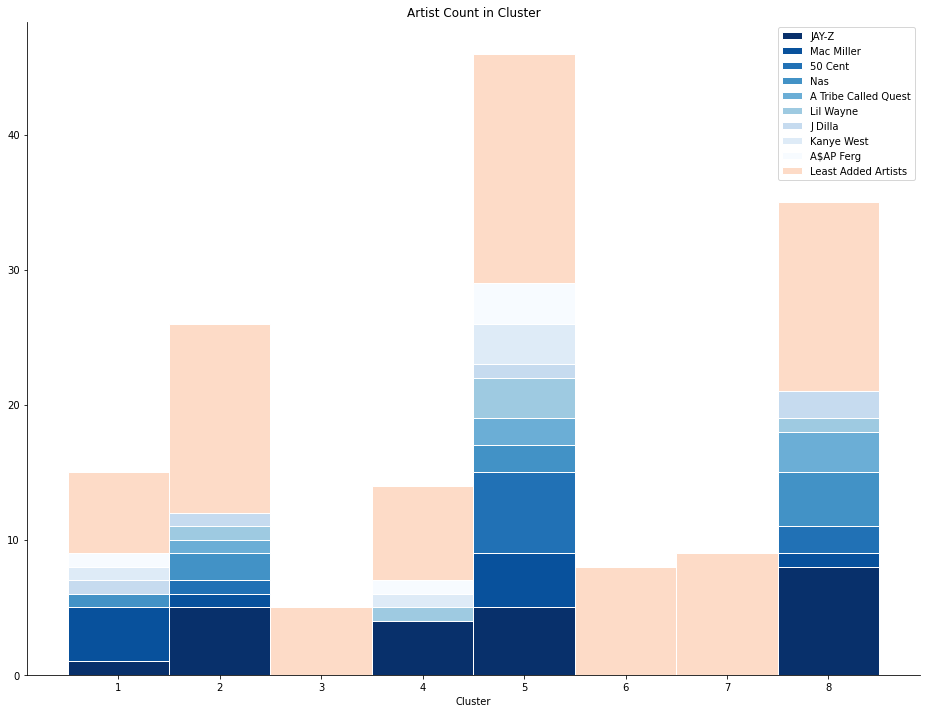

In [98]:
## Visualising the artist counts in cluster
one = [1, 5, 0, 4, 5, 0, 0, 8]
two = [4, 1, 0, 0, 4, 0, 0, 1]
three = [0, 1, 0, 0, 6, 0, 0, 2]
four = [1, 2, 0, 0, 2, 0, 0, 4]
five = [0, 1, 0, 0, 2, 0, 0, 3]
six = [0, 1, 0, 1, 3, 0, 0, 1]
seven = [1, 1, 0, 0, 1, 0, 0, 2]
eight = [1, 0, 0, 1, 3, 0, 0, 0]
nine = [1, 0, 0, 1, 3, 0, 0, 0]
col_sum = [6, 14, 5, 7, 17, 8, 9, 14 ]

# The position of the bars on the x-axis
r = list(range(0, 8))
 
# Names of group and bar width
names = list(range(1, 9))
barWidth = 1

plt.figure(figsize = (16, 12))
# Create brown bars
plt.bar(r, one, color='#08306b', edgecolor='white', width=barWidth, label = 'JAY-Z')
# Create green bars (middle), on top of the firs ones
plt.bar(r, two, bottom=one, color='#08519c', edgecolor='white', width=barWidth, label = 'Mac Miller')
# Create green bars (top)
plt.bar(r, three, bottom= np.array(one)+np.array(two), color='#2171b5', edgecolor='white', width=barWidth, label = '50 Cent')
plt.bar(r, four, bottom= np.array(one)+np.array(two)+np.array(three), color='#4292c6', edgecolor='white', \
        width=barWidth, label = 'Nas')
plt.bar(r, five, bottom= np.array(one)+np.array(two)+np.array(three)+np.array(four), color='#6baed6', \
        edgecolor='white', width=barWidth, label = 'A Tribe Called Quest')
plt.bar(r, six, bottom= np.array(one)+np.array(two)+np.array(three)+np.array(four)+np.array(five), \
        color='#9ecae1', edgecolor='white', width=barWidth, label = 'Lil Wayne')
plt.bar(r, seven, bottom= np.array(one)+np.array(two)+np.array(three)+np.array(four)+np.array(five)+np.array(six), \
        color='#c6dbef', edgecolor='white', width=barWidth, label = 'J Dilla')
plt.bar(r, eight, bottom= np.array(one)+np.array(two)+np.array(three)+np.array(four)+np.array(five)+np.array(six)+ \
        np.array(seven), color='#deebf7', edgecolor='white', width=barWidth, label = 'Kanye West')
plt.bar(r, nine, bottom= np.array(one)+np.array(two)+np.array(three)+np.array(four)+np.array(five)+np.array(six)+ \
        np.array(seven)+np.array(eight), color='#f7fbff', edgecolor='white', width=barWidth, label = 'A$AP Ferg')
plt.bar(r, col_sum, bottom= np.array(one)+np.array(two)+np.array(three)+np.array(four)+np.array(five)+np.array(six)+ \
        np.array(seven)+np.array(eight)+np.array(nine), color='#fddbc7', edgecolor='white', width=barWidth, \
        label = 'Least Added Artists')
 
# Custom X axis
plt.xticks(r, names)
plt.xlabel("Cluster")
plt.gca().spines['right'].set_color('none')
plt.gca().spines['top'].set_color('none')
plt.legend()
plt.title('Artist Count in Cluster')
# Show graphic
plt.show()

The plot above shows in which clusters my top 10 artists appear in. The darker the blue the more times the artist is features in my playlist and thus features in clusters. There are roughly 83 songs from my most popular artists and thus 83 times the artists appear on the plot. The orange bars represent 80 songs from artists who I have only added 1 into my playlist, these are my least added artists. My most "liked" or popular artists only appear in clusters 1, 2, 4, 5 and 8. These clusters are the rap and hip hop heavy clusters we discovered above in the genre analysis. None of my favorite artists appear in clusters 3, 6 or 7... the clusters established to be more lo-fi, alternative r&b and classic rock.

## My Tastes to Global Top 50
I have always considered myself to have relatively unique music tastes, by that, I mean that I don't listen to music because it is what everyone else is listening to. I don't listen to the radio which forces out popular hit after hit. I try to find the music that I like by digging around, exploring artists and their music’s samples and from recommendations by my friends which tend to have the same music style I like. 

I thought it might be interesting to compare how my actual tastes from my playlist that has been analyzed compares to the tastes of the Global Top 50. The Global Top 50 is the a Spotify global playlist of the 50 most played songs "right now". This playlist, along with its songs and the audio features attributed to those songs will be used for analysis.

In [99]:
## Fetch global top 50
global_top_50 = playlist_df('37i9dQZEVXbMDoHDwVN2tF')[0]

In [100]:
## Create df with audio features
features = list()

for n, chunk_series in global_top_50.groupby(np.arange(len(global_top_50)) // 100)['id']:
    features += sp.audio_features([*map(str, chunk_series)])

features_df = pd.DataFrame.from_dict(filter(None, features))

gt5_tracks_with_features_df = global_top_50.merge(features_df, on = ['id'], how = 'inner')

In [101]:
gt5_tracks_with_features_df.head()

,id,name,artist,album,track popularity,release_date,added_at,month,danceability,energy,...,instrumentalness,liveness,valence,tempo,type,uri,track_href,analysis_url,duration_ms,time_signature
0,7ytR5pFWmSjzHJIeQkgog4,ROCKSTAR (feat. Roddy Ricch),DaBaby,BLAME IT ON BABY,98,2020-04-17,1970-01-01 00:00:00+00:00,Global Top 50,0.746,0.690,...,0.000000,0.1010,0.497,89.977,audio_features,spotify:track:7ytR5pFWmSjzHJIeQkgog4,https://api.spotify.com/v1/tracks/7ytR5pFWmSjz...,https://api.spotify.com/v1/audio-analysis/7ytR...,181733,4
1,0VjIjW4GlUZAMYd2vXMi3b,Blinding Lights,The Weeknd,After Hours,100,2020-03-20,1970-01-01 00:00:00+00:00,Global Top 50,0.514,0.730,...,0.000095,0.0897,0.334,171.005,audio_features,spotify:track:0VjIjW4GlUZAMYd2vXMi3b,https://api.spotify.com/v1/tracks/0VjIjW4GlUZA...,https://api.spotify.com/v1/audio-analysis/0VjI...,200040,4
2,24Yi9hE78yPEbZ4kxyoXAI,Roses - Imanbek Remix,SAINt JHN,Roses (Imanbek Remix),97,2019-10-09,1970-01-01 00:00:00+00:00,Global Top 50,0.770,0.724,...,0.010700,0.3530,0.898,121.975,audio_features,spotify:track:24Yi9hE78yPEbZ4kxyoXAI,https://api.spotify.com/v1/tracks/24Yi9hE78yPE...,https://api.spotify.com/v1/audio-analysis/24Yi...,176840,4
3,7ju97lgwC2rKQ6wwsf9no9,Rain On Me (with Ariana Grande),Lady Gaga,Chromatica,83,2020-05-29,1970-01-01 00:00:00+00:00,Global Top 50,0.672,0.855,...,0.000000,0.3230,0.646,123.056,audio_features,spotify:track:7ju97lgwC2rKQ6wwsf9no9,https://api.spotify.com/v1/tracks/7ju97lgwC2rK...,https://api.spotify.com/v1/audio-analysis/7ju9...,182200,4
4,466cKvZn1j45IpxDdYZqdA,Toosie Slide,Drake,Dark Lane Demo Tapes,87,2020-05-01,1970-01-01 00:00:00+00:00,Global Top 50,0.830,0.490,...,0.000003,0.1130,0.845,81.604,audio_features,spotify:track:466cKvZn1j45IpxDdYZqdA,https://api.spotify.com/v1/tracks/466cKvZn1j45...,https://api.spotify.com/v1/audio-analysis/466c...,247059,4


Some basic transformations need to be done on the data in order to allow for easier analysis and interpretation. For example, track release day will be transformed to release year and the duration of a track in milliseconds will be turned to seconds.

In [102]:
## Create release year
tracks_with_features_df['release year'] = tracks_with_features_df['release_date'].dt.year
gt5_tracks_with_features_df['release year'] = gt5_tracks_with_features_df['release_date'].dt.year

## Create song duration (sec)
tracks_with_features_df['song duration (sec)'] = tracks_with_features_df['duration_ms'] / 1000
gt5_tracks_with_features_df['song duration (sec)'] = gt5_tracks_with_features_df['duration_ms'] / 1000

In [103]:
dist_audio_features = audio_features + ['key', 'track popularity', 'release year', 'song duration (sec)', 'mode']

### Distribution Plots
Below are many distribution plots of the audio features from songs in the Global Top 50 playlist (in blue) and audio features from songs in my playlist (in red). There are mostly similarities for each feature studied. It seems to be there are more extremes in the Global Top 50 playlist compared to mine. 

My playlist seems (as a whole) less danceable than the songs on the Global Top 50 (GT50) and this seems to make sense as radio hits tend to be more dancy. Similarly, the energy feature for songs on the GT50 is higher than my playlist. The distribution for energy of my playlists seems to be a normal distribution which is fascinating. 

In general GT50 tracks are quite loud, this goes hand in hand with the energy and danceability features explored in earlier distribution plots. An easy distribution to explain is the track popularity one, mine seems fairly normally distributed with a spike nearer the 0 point while all the tracks on the GT50 are extremely popular (makes sense).


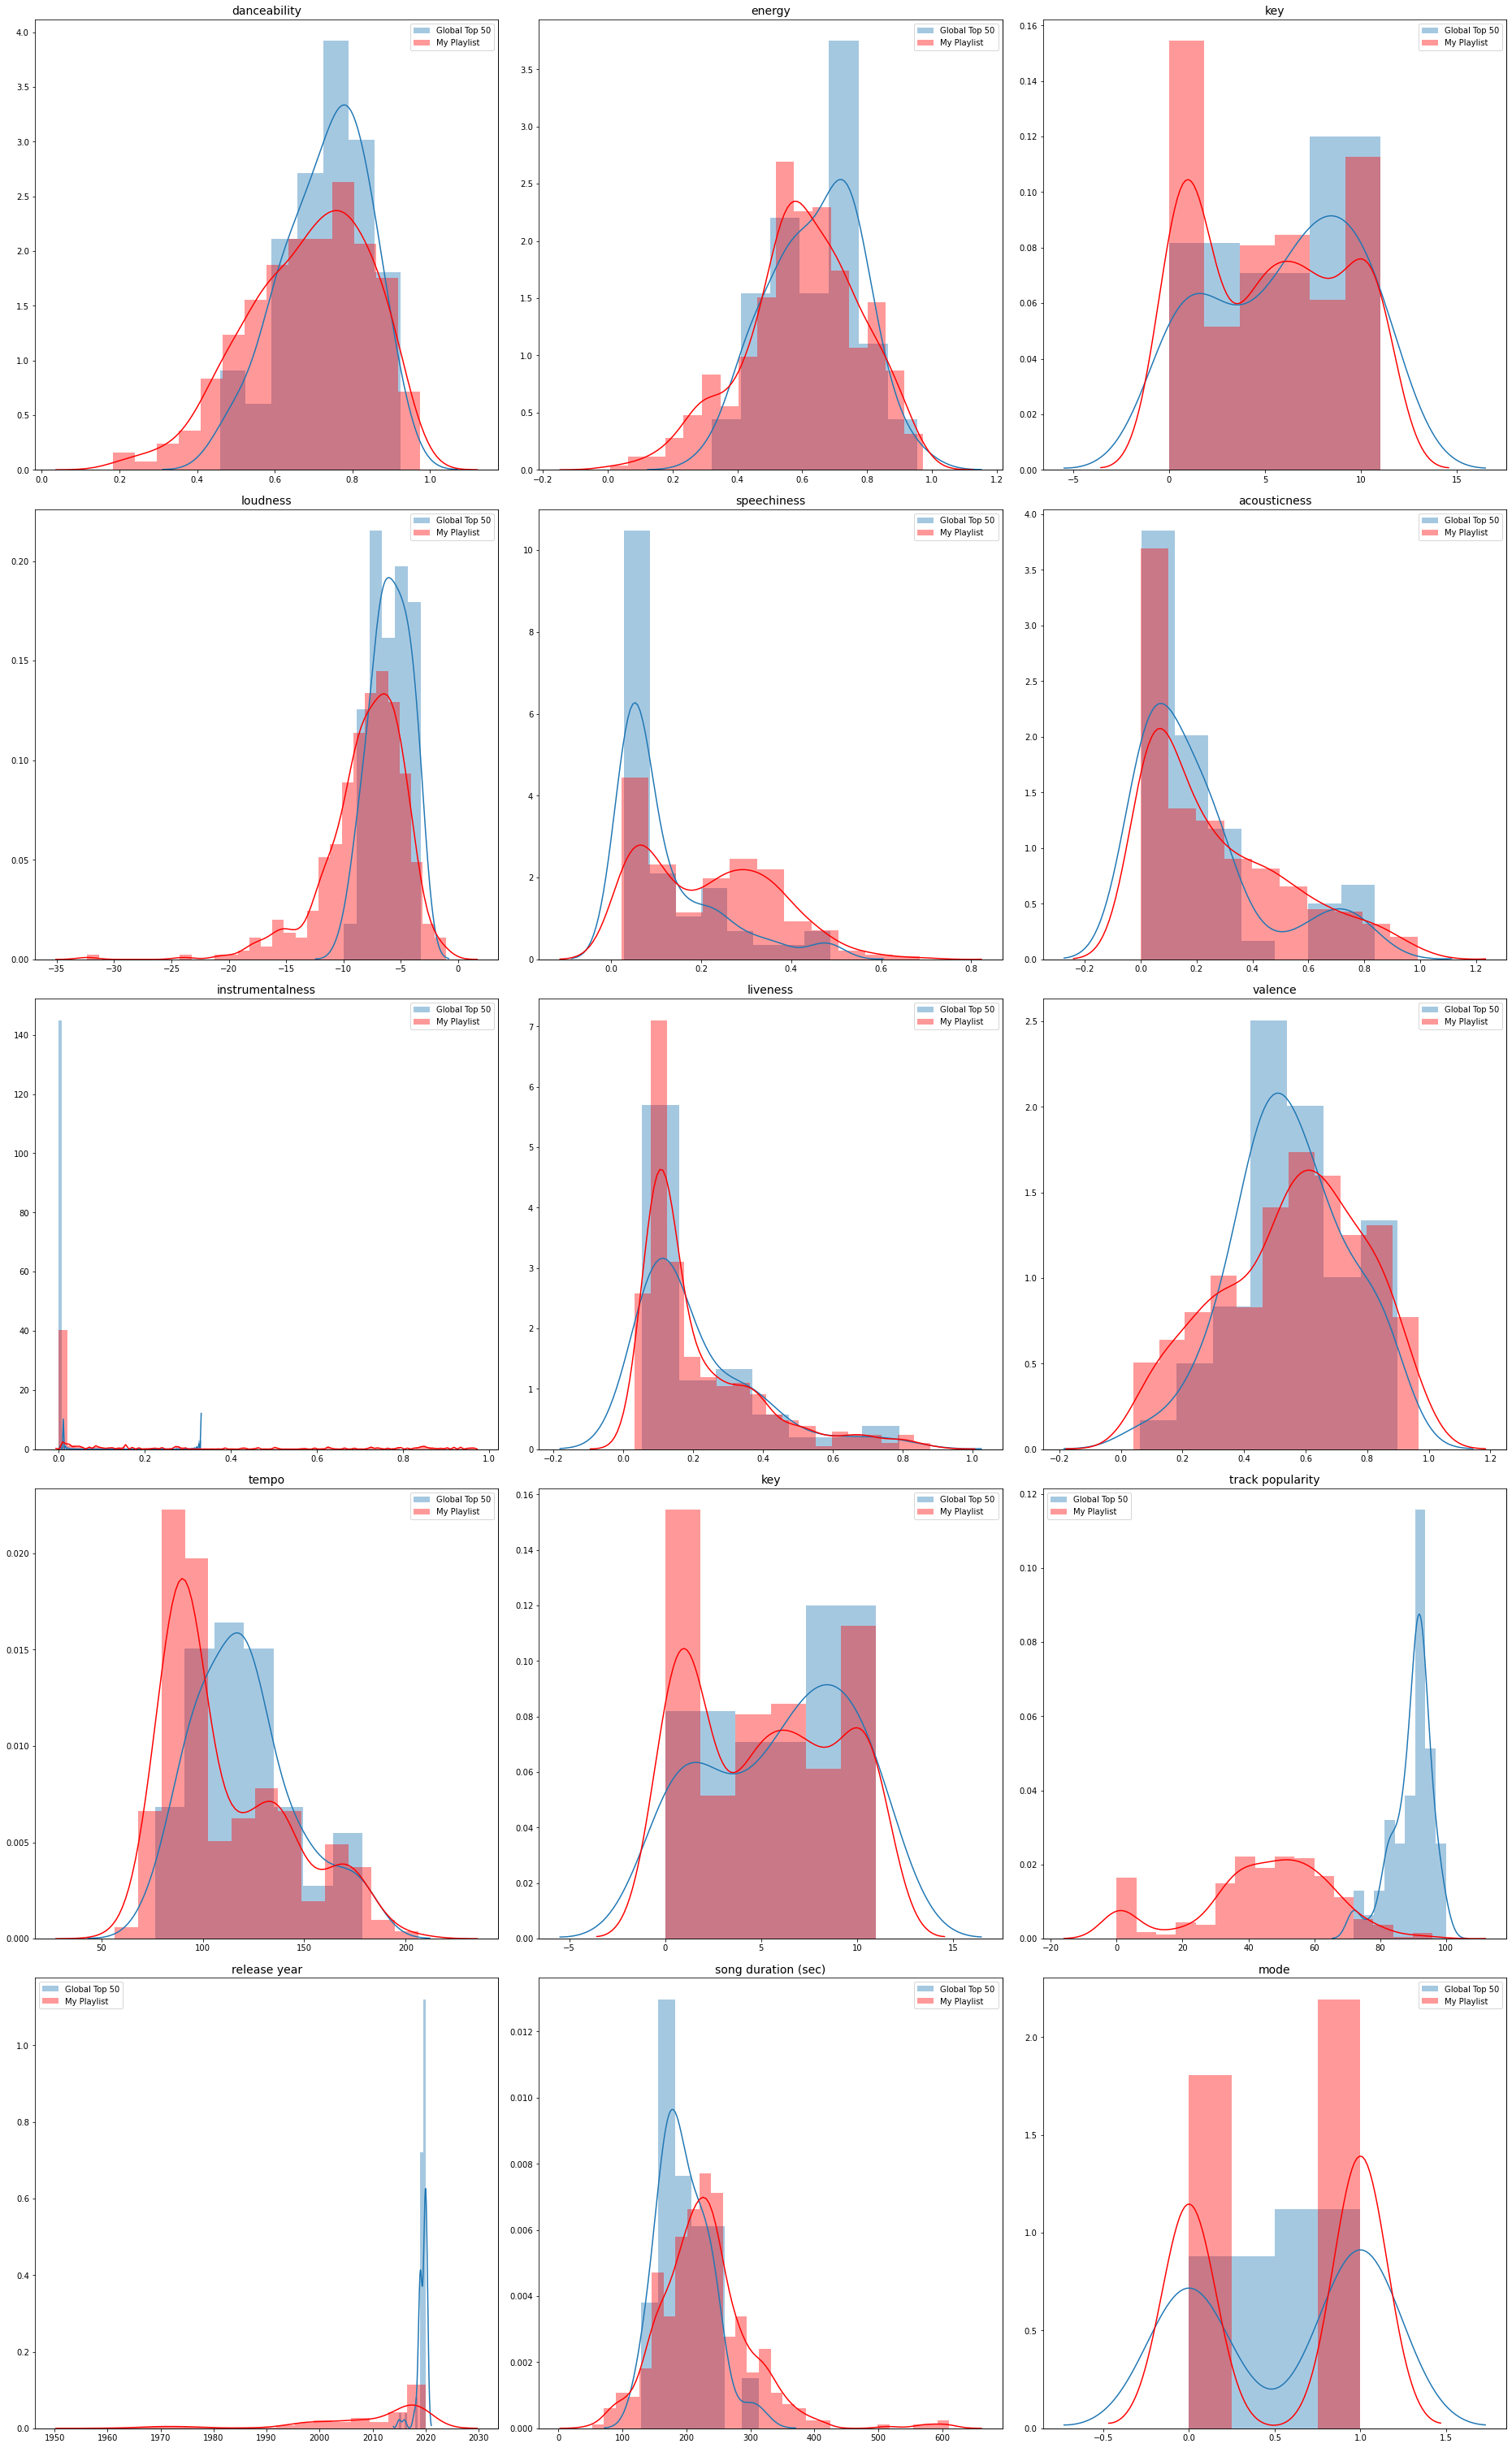

In [104]:
dist_audio_features
nums = list(range(1, 16))

fig, axes = plt.subplots(nrows = 5, ncols = 3, figsize = (26, 42))

for ax, af, num in zip(axes.flatten(), dist_audio_features, nums):
    ax = fig.add_subplot(5, 3, num)
    ax.set_title(f'{af}', size = 14)
    sns.distplot(gt5_tracks_with_features_df[af], label = 'Global Top 50')
    sns.distplot(tracks_with_features_df[af], color = 'red', label = 'My Playlist')
    ax.set_xlabel('')
    ax.set_ylabel('')
    plt.legend() 
    
for ax in axes.flatten():
    ax.set_xticks([])
    ax.set_yticks([])

plt.tight_layout()    
plt.show()

The results in general to me were surprising. I thought my track selection would vary even more than is shown by these plots compared to the GT50. The similarities might be linked to the fact that the GT50 is more and more dominated by hip hop tracks. Comparing my playlist to the GT50 in the early 2010s might have led to something extremely different. In the words of Kanye West, "Rap is the new Rock n' Roll". It has dominated this generation and decade, most chart successful songs hold rap / and hip hop elements.

## Song Count and Most Listened To
The Spotipy API, is also lacking another crucial feature... The ability to count how many times you have listened to a song/artist/album and to find out *how long* you have listened for. Luckily, some of this information can be extracted through a manual data download that Spotify is required to give you in order to be GDPR compliant. In order to get this data a user must log into their Spotify account, under 'Privacy settings' you will find a section called 'Download your data'. Here follow the simple steps to request your data. Once requested the data file can take up to 30 days (!!!) to be sent to you however, mine took 5.

In order to become GDPR compliant Spotify has introduced a automated Download data function, which allows the user to receive several files in JSON format. JSON stands for JavaScript Object Notation, and is a structured, commonly used format that is capable of being understood by both computers and human beings.

Various different JSON files are sent to the user after the data is requested. This section below will take a look at the Inferences file and the StreamingHistory file. The StreamingHistory file is a list of items (e.g. songs, videos, and podcasts) listened to or watched in the past year, including:

        Date and time of when the stream ended in UTC format (Coordinated Universal Time zone). 
        Name of "creator" for each stream (e.g. the artist name if a music track). 
        Name of items listened to or watched (e.g. title of music track or name of video). 
        “msPlayed”- Stands for how many milli-seconds the track was listened.

This section takes the my streaming history JSON files, converts it into a pandas data frame that is ready for analysis.

In [105]:
## Import streaming history
streaming_history0_df = pd.read_csv(r'C:\Users\Jaume\Documents\Python Projects\spotify\data\MyData\StreamingHistory0.json')
streaming_history1_df = pd.read_csv(r'C:\Users\Jaume\Documents\Python Projects\spotify\data\MyData\StreamingHistory1.json')

streaming_history_df = pd.concat([streaming_history0_df, streaming_history1_df], axis = 0)

In [106]:
## Dictionaries with count and listen_time
tracks_count = {}
for song in streaming_history_df['trackName']:
    if song in tracks_count:
        tracks_count[song] += 1
    else:
        tracks_count[song] = 1

# for song in sorted(tracks.items(), key=lambda x: x[1], reverse=True)[1:30]:
#     print(song)

tracks = {}
for song in streaming_history_df['trackName']:
    if song in tracks:
        df = streaming_history_df.loc[streaming_history_df['trackName'] == song]
        tracks[song] += df['msPlayed'].sum() / 1000
    else:
        df = streaming_history_df.loc[streaming_history_df['trackName'] == song]
        tracks[song] = df['msPlayed'].sum() / 1000

# for song in sorted(tracks.items(), key=lambda x: x[1], reverse=True)[1:30]:
#     print(song[0], round((song[1]/60)/60,2), "hrs")

In [107]:
streaming_history_df['endTime'] = pd.to_datetime(streaming_history_df['endTime'])
print(f"Between the first and last 'endTime' of the dataframe there are" \
f" {streaming_history_df['endTime'].max() - streaming_history_df['endTime'].min()} hours") 

Between the first and last 'endTime' of the dataframe there are 368 days 18:47:00 hours


In [108]:
## Create DF map to dictionary and show
track_time_df = pd.DataFrame(list(tracks.items()),columns = ['track_name','listening_time']) 
track_time_df['listening_time'] = round((track_time_df['listening_time'] / 60) / 60 ,2)
track_time_df['listening_days'] = round((track_time_df['listening_time'] / 24), 2)

track_time_df = track_time_df.sort_values('listening_time', ascending = False).head(20)
track_time_df['listen_count'] = track_time_df['track_name'].map(tracks_count)
track_time_df

,track_name,listening_time,listening_days,listen_count
70,Trophies,226.67,9.44,71
121,How's It Goin' Down,198.76,8.28,62
2257,Draft Day,170.61,7.11,52
128,Where The Hood At,120.05,5.00,49
76,Ali Bomaye,97.88,4.08,35
129,Ruff Ryders' Anthem,89.77,3.74,47
805,Yes Indeed,80.65,3.36,48
655,Praise The Lord (Da Shine) (feat. Skepta),79.27,3.30,42
702,Remember the Name (feat. Styles of Beyond),77.96,3.25,40
68,POWER,76.08,3.17,34


These numbers are a little 

### Current Top Tracks and Artists
Spotipy has a cool function which allows the user to retrieve the top tracks and artists at "short, medium, long - term" values. Spotify is not clear on the date range these time periods are valid for but we can still have some fun! 

This section will identify which artists and which tracks have passed the test of time and are present in my short, medium and long term rankings.


In [109]:
## Function to fetch top artists/songs
def current_top(parameter, time_range):
    l = list()
    if parameter == 'artists':
        for i in range(0, 20):
            l.append(sp.current_user_top_artists(time_range = time_range)['items'][i]['name'])
        return l
        
    elif parameter == 'tracks':
        for i in range(0, 20):
            l.append(sp.current_user_top_tracks(time_range = time_range)['items'][i]['name'])
        return l
    else:
        raise ValueError('parameter value must be "artists" or "tracks".')

In [110]:
lt_artists = current_top('artists', 'long_term')
mt_artists = current_top('artists', 'medium_term')
st_artists = current_top('artists', 'short_term')

In [111]:
## Group all playlists
allt_artists = lt_artists + mt_artists + st_artists

Not surprisingly, JAY-Z and Drake have both been present in my short, medium and long term top artist rank!

In [112]:
from collections import Counter
c = Counter(allt_artists) 

# Just output counts > 2
for k, v in c.items():
    if v > 2:
        print('{} has passed the test of time and appears {} times'.format(k, v))

Drake has passed the test of time and appears 3 times
JAY-Z has passed the test of time and appears 3 times


In [113]:
lt_tracks = current_top('tracks', 'long_term')
mt_tracks = current_top('tracks', 'medium_term')
st_tracks = current_top('tracks', 'short_term')

In [114]:
## Group all playlists
allt_tracks = lt_tracks + mt_tracks + st_tracks

Interestingly no songs from my entier Spotify listening history have withstood the test of time... The results have had to be relaxed to allow for songs that have appeared at least twice. Even then there are only three songs, all these slap though.

In [115]:
c = Counter(allt_tracks) 

# Just output counts > 2
for k, v in c.items():
    if v > 1:
        print('{} has passed the test of time and appears {} times'.format(k, v))

The Percocet & Stripper Joint has passed the test of time and appears 2 times
Lifeboats (Freestyle) has passed the test of time and appears 2 times
Killa Cam has passed the test of time and appears 2 times


## Conclusion
The Spotipy API makes it easy to access data for analysis and for personal app creation. The API is important because it allows individuals or organizations to harvest and use data in the means they see fit. It allows for personal investigation as has been done here and it allows for users to gain a better understanding of what they can build with what is available.

Spoitfy has been pushing the musical AI space further and further each year with its purchases of data centered companies. Companies that will allow it to continue discovering unique state-of-the-art ways to provide its users with music selections they desire.

Spotify describes its successful implementation of machine learning in a Hyperight AB keynote in the following four ways.

    1. The large volume of playlists created by the users.
    2. The emotion attached to the user in creating those playlists.
    3. 9 years of continuous iteration and hard work.
    4. Team of user researcher, data scientist, and data engineer.

The plans are of course to take this learning and continue pushing everything even more. Spotify plans to facilitate its offering even further for users. The will combine the current data they have with other data sources like GPS location, age, and work. For example, if you are commuting to your work in the morning or coming back from it. Or you are listening to music in the evening at your home or what type of music you like to listen when you are going to the gym. Also when it gets connected to the fitness tracker band or apple watch they will now know what your pulse rate is and what type of music will help you. In the upcoming future, they will be using machine learning and Artificial intelligence to automate their music recommendations.  Now you don't have to pick the playlist manually when you are traveling or going to the gym or taking heavyweight Spotify will know what songs you will be liking at that moment of time. This will be a great implementation of AI providing real value to their customers.

## Further Reading
#### Spotify
https://en.wikipedia.org/wiki/Spotify  
https://www.bloomberg.com/quote/SPOT:US  

#### Spotipy
https://spotipy.readthedocs.io/en/2.12.0/  
https://morioh.com/p/31b8a607b2b0  

#### Collaborative Filtering
https://realpython.com/build-recommendation-engine-collaborative-filtering/  
https://en.wikipedia.org/wiki/Collaborative_filtering  

#### PCA and K-Means
https://en.wikipedia.org/wiki/Principal_component_analysis  
https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html  
https://en.wikipedia.org/wiki/K-means_clustering  
https://www.analyticsvidhya.com/blog/2019/08/comprehensive-guide-k-means-clustering/  